I would like to explore how  a fighter like Charles "Do Bronx" Oliveira, comes out on top in the UFC Lightweight Division, one of the most competative divisions in the promotion. This analysis comes directly after his 
dominant win over Dustin Poirier for the Lightweight title. 12/24/21

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
pd.set_option('display.max_columns', None)

In the 10 fights prior to his current 10 fight win streak that includes fights with budding 
ufc hopefuls and future UFC Champtions like Max Holloway and Paul Felder, as well as the beginning of his 
switch to lightweight in which over time has shown to be a decision that has been able to
return great dividends to his career. During that period its clear that Charles still did not 
posses the concrete skills nor the intangibles to compete with the elite of either the featherweight or Lightweight division.
Here I would like to explore the difference between the different versions of Charles from 2014-2017, the Past Oliveira and 
2018-2021 the Champ Oliveira.

# Analysis of two different Charles

# Featherweight Charles

In [3]:
df1 = pd.read_csv('charles_before_champ_run.csv', error_bad_lines=False)

df1.dropna()

df1['seconds'] = df1.control_time.str.split(':',expand=True)[1]
df1['minutes'] = df1.control_time.str.split(':',expand=True)[0]

df1['seconds'] = df1['seconds'].astype(int)
df1['minutes'] = df1['minutes'].astype(int)

df1['control_time'] = (df1['minutes'] * 60) + df1['seconds']
df1 = df1.drop(columns=['seconds','minutes'])


df1['seconds'] = df1.ending_time.str.split(':',expand=True)[1]
df1['minutes'] = df1.ending_time.str.split(':',expand=True)[0]

df1['seconds'] = df1['seconds'].astype(int)
df1['minutes'] = df1['minutes'].astype(int)

df1['ending_time'] = (df1['minutes'] * 60) + df1['seconds']
df1 = df1.drop(columns=['seconds','minutes'])


# TODO: Fix this because not every round has a time when it was ended 
# First add another column named round_duration this will either be the ending time or 300
# Then locate all columns that 

df1.loc[df1.round_number != df1.ending_round,'ending_time'] = 300
df1['standing_time'] = df1.ending_time - df1.control_time

print(df1.columns)

Index(['fight_id', 'fight_title', 'winning_fighter_name',
       'losing_fighter_name', 'weight_class', 'method_of_victory',
       'specific_victory_details', 'ending_round', 'ending_time', 'fight_url',
       'unique_round_id', 'unique_fight_id', 'unique_event_id', 'round_number',
       'fighter_name', 'knockdowns', 'total_strikes_landed',
       'total_strikes_attempted', 'takedowns', 'takedowns_attempted',
       'submission_attempts', 'guard_passes', 'reversals', 'control_time',
       'unique_round_id.1', 'unique_fight_id.1', 'unique_event_id.1',
       'round_number.1', 'fighter_name.1', 'significant_strikes_head_landed',
       'significant_strikes_head_attempted', 'significant_strikes_body_landed',
       'significant_strikes_body_attempted', 'significant_strikes_leg_landed',
       'significant_strikes_leg_attempted',
       'significant_strikes_standing_landed',
       'significant_strikes_standing_attempted',
       'significant_strikes_clinch_landed',
       'significant_

In [4]:
df1.head(5)
#print(df1.tail(5))

,fight_id,fight_title,winning_fighter_name,losing_fighter_name,weight_class,method_of_victory,specific_victory_details,ending_round,ending_time,fight_url,unique_round_id,unique_fight_id,unique_event_id,round_number,fighter_name,knockdowns,total_strikes_landed,total_strikes_attempted,takedowns,takedowns_attempted,submission_attempts,guard_passes,reversals,control_time,unique_round_id.1,unique_fight_id.1,unique_event_id.1,round_number.1,fighter_name.1,significant_strikes_head_landed,significant_strikes_head_attempted,significant_strikes_body_landed,significant_strikes_body_attempted,significant_strikes_leg_landed,significant_strikes_leg_attempted,significant_strikes_standing_landed,significant_strikes_standing_attempted,significant_strikes_clinch_landed,significant_strikes_clinch_attempted,significant_strikes_ground_landed,significant_strikes_ground_attempted,event_id,event_title,event_date,event_location,event_attendance,event_url,standing_time
0,1864,UFC on FOX: Dos Anjos vs. Cowboy 2,Charles Oliveira,Myles Jury,Featherweight,SUB,Guillotine Choke,1,185,164f56eb25d6a9b4,583,1864,175,1,Charles Oliveira,0,10,16,1,1,1,2,0,11,583,1864,175,1,Charles Oliveira,0,4,3,4,2,2,5,10,0,0,0,0,175,UFC on FOX: Dos Anjos vs. Cowboy 2,2015-12-19,"Orlando, Florida, USA","14,459",80d918336163b80c,174
1,1864,UFC on FOX: Dos Anjos vs. Cowboy 2,Charles Oliveira,Myles Jury,Featherweight,SUB,Guillotine Choke,1,185,164f56eb25d6a9b4,584,1864,175,1,Myles Jury,0,5,16,0,0,0,0,0,97,584,1864,175,1,Myles Jury,3,14,1,1,1,1,5,16,0,0,0,0,175,UFC on FOX: Dos Anjos vs. Cowboy 2,2015-12-19,"Orlando, Florida, USA","14,459",80d918336163b80c,88
2,2074,UFC Fight Night: Holloway vs Oliveira,Max Holloway,Charles Oliveira,Featherweight,KO/TKO,NaN,1,99,05e2832cd5ffb7a6,847,2074,196,1,Max Holloway,0,14,29,0,0,0,0,0,6,847,2074,196,1,Max Holloway,6,20,8,9,0,0,14,29,0,0,0,0,196,UFC Fight Night: Holloway vs Oliveira,2015-08-23,"Saskatoon, Saskatchewan,","7,202",2ce6541127b0e232,93
3,2074,UFC Fight Night: Holloway vs Oliveira,Max Holloway,Charles Oliveira,Featherweight,KO/TKO,NaN,1,99,05e2832cd5ffb7a6,848,2074,196,1,Charles Oliveira,0,5,17,0,1,0,0,0,0,848,2074,196,1,Charles Oliveira,3,15,1,1,1,1,4,16,1,1,0,0,196,UFC Fight Night: Holloway vs Oliveira,2015-08-23,"Saskatoon, Saskatchewan,","7,202",2ce6541127b0e232,99
4,2590,UFC Fight Night: Te Huna vs Marquardt,Charles Oliveira,Hatsu Hioki,Featherweight,SUB,Anaconda Choke,2,300,a4759c52378f9d1a,2679,2590,242,1,Hatsu Hioki,0,19,27,1,2,0,1,0,171,2679,2590,242,1,Hatsu Hioki,4,8,3,5,0,0,3,5,2,3,2,5,242,UFC Fight Night: Te Huna vs Marquardt,2014-06-28,"Auckland, New Zealand","8,089",ac9521250dc1a14c,129


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 48 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   fight_id                                50 non-null     int64 
 1   fight_title                             50 non-null     object
 2   winning_fighter_name                    50 non-null     object
 3   losing_fighter_name                     50 non-null     object
 4   weight_class                            50 non-null     object
 5   method_of_victory                       50 non-null     object
 6   specific_victory_details                36 non-null     object
 7   ending_round                            50 non-null     int64 
 8   ending_time                             50 non-null     int32 
 9   fight_url                               50 non-null     object
 10  unique_round_id                         50 non-null     int64 
 11  unique_f

In [6]:
df1.isnull().sum()

fight_id                                   0
fight_title                                0
winning_fighter_name                       0
losing_fighter_name                        0
weight_class                               0
method_of_victory                          0
specific_victory_details                  14
ending_round                               0
ending_time                                0
fight_url                                  0
unique_round_id                            0
unique_fight_id                            0
unique_event_id                            0
round_number                               0
fighter_name                               0
knockdowns                                 0
total_strikes_landed                       0
total_strikes_attempted                    0
takedowns                                  0
takedowns_attempted                        0
submission_attempts                        0
guard_passes                               0
reversals 

In [7]:
df1.describe

<bound method NDFrame.describe of     fight_id                                        fight_title  \
0       1864                 UFC on FOX: Dos Anjos vs. Cowboy 2   
1       1864                 UFC on FOX: Dos Anjos vs. Cowboy 2   
2       2074              UFC Fight Night: Holloway vs Oliveira   
3       2074              UFC Fight Night: Holloway vs Oliveira   
4       2590              UFC Fight Night: Te Huna vs Marquardt   
5       2590              UFC Fight Night: Te Huna vs Marquardt   
6       2590              UFC Fight Night: Te Huna vs Marquardt   
7       2590              UFC Fight Night: Te Huna vs Marquardt   
8       6278                   UFC Fight Night: Maia vs. Condit   
9       6278                   UFC Fight Night: Maia vs. Condit   
10      6278                   UFC Fight Night: Maia vs. Condit   
11      6278                   UFC Fight Night: Maia vs. Condit   
12      6278                   UFC Fight Night: Maia vs. Condit   
13      6278                

In [8]:

#df1.standing_time = df1.standing_time.loc[df1.standing_time < 6]

In [9]:
# ko_percent = df1[['winning_fighter_name', 'losing_fighter_name', 'method_of_victory', 'specific_victory_details', 'event_date']]

# #fill in Empty specific victory details
# ko_percent.loc[1].at['specific_victory_details'] = 'At Distance Shoulder Injury'
# ko_percent.loc[12].at['specific_victory_details'] = 'Decision'
# ko_percent.loc[13].at['specific_victory_details'] = 'Decision'
# ko_percent.loc[14].at['specific_victory_details'] = 'Decision'


# ko_percent.head(21)



Dropping the duplicates and manually adding fight outcome ratios

In [10]:
# ko_percent = ko_percent.drop([3, 6, 7, 9, 11, 13, 14, 16, 17, 19, 20])
# ko_percent.sort_values(by=['event_date'], inplace=True)

# ko_percent['finished_percentage'] = '0%'
# ko_percent['finish_percentage'] = '100%'
# ko_percent['finished_ratio'] = '0:0'
# ko_percent['finish_ratio'] = '0:0'



# ko_percent['finished_ratio'].iloc[[ko_percent.losing_fighter_name == 'Andy Ogle']] = '0:1'
# ko_percent['finished_ratio'].iloc[[ko_percent.losing_fighter_name == 'Hatsu Hioki']] = '0:2'
# ko_percent['finished_ratio'].iloc[[ko_percent.losing_fighter_name == 'Jeremy Stephens']] = '0:3'
# ko_percent['finished_ratio'].iloc[[ko_percent.losing_fighter_name == 'Nik Lentz']] = '0:4'
# ko_percent['finished_ratio'].iloc[[ko_percent.winning_fighter_name == 'Max Holloway']] = '1:5'
# ko_percent['finished_ratio'].iloc[[ko_percent.losing_fighter_name == 'Myles Jury']] = '1:6'
# ko_percent['finished_ratio'].iloc[[ko_percent.winning_fighter_name == 'Anthony Pettis']] = '2:7'
# ko_percent['finished_ratio'].iloc[[ko_percent.winning_fighter_name == 'Ricardo Lamas']] = '3:8'
# ko_percent['finished_ratio'].iloc[[ko_percent.losing_fighter_name == 'Will Brooks']] = '3:9'
# ko_percent['finished_ratio'].iloc[[ko_percent.winning_fighter_name == 'Paul Felder']] = '4:10'


# ko_percent['finish_ratio'].iloc[[ko_percent.losing_fighter_name == 'Andy Ogle']] = '1:1'
# ko_percent['finish_ratio'].iloc[[ko_percent.losing_fighter_name == 'Hatsu Hioki']] = '2:2'
# ko_percent['finish_ratio'].iloc[[ko_percent.losing_fighter_name == 'Jeremy Stephens']] = '2:3'
# ko_percent['finish_ratio'].iloc[[ko_percent.losing_fighter_name == 'Nik Lentz']] = '3:4'
# ko_percent['finish_ratio'].iloc[[ko_percent.winning_fighter_name == 'Max Holloway']] = '3:5'
# ko_percent['finish_ratio'].iloc[[ko_percent.losing_fighter_name == 'Myles Jury']] = '4:6'
# ko_percent['finish_ratio'].iloc[[ko_percent.winning_fighter_name == 'Anthony Pettis']] = '4:7'
# ko_percent['finish_ratio'].iloc[[ko_percent.winning_fighter_name == 'Ricardo Lamas']] = '4:8'
# ko_percent['finish_ratio'].iloc[[ko_percent.losing_fighter_name == 'Will Brooks']] = '5:9'
# ko_percent['finish_ratio'].iloc[[ko_percent.winning_fighter_name == 'Paul Felder']] = '5:10'

# #ko_percent.head(11)
# percentages = ko_percent[['finished_percentage', 'finish_percentage', 'finished_ratio', 'finish_ratio', 'event_date', 'winning_fighter_name', 'losing_fighter_name']]
# percentages.head()



In [11]:
# percentages = percentages.reset_index(drop=True)
# #percentages = percentages.drop(columns='index')

# finish_ratios = percentages.finish_ratio.array

# finished_ratios = percentages.finished_ratio.array

# finished = []
# percent = []

# for ratio in finished_ratios:
#     x, y = ratio.split(':')
#     p = (int(x) / int(y)) 
#     per = '{:.0%}'.format(p)
#     finished.append(str(per))
    
# for ratio in finish_ratios:
#     x, y = ratio.split(':')
    
#     p = (int(x) / int(y))
#     per = '{:.0%}'.format(p)
#     percent.append(str(per))
#     #print(f'x: {x}')
#     #print(f'y: {y}')

# print(percent)
# print(finished)
# #print(percentages.iloc[0, 'finish_ratio'])
# percentages['finish_percentage'] = percent
# percentages['finished_percentage'] = finished
# percentages.head(101)

Its clear to see that during this run Charles does not find consistency in his performances. He goes from finishing most of his fights to being finished multiple times and even trying a heavier division where he is also finished

In [138]:
# creating the group frame

group_frame = df1[['fighter_name','significant_strikes_standing_landed', 'significant_strikes_head_landed', 'significant_strikes_head_attempted', 'significant_strikes_body_landed', 'significant_strikes_body_attempted', 'significant_strikes_leg_attempted', 'significant_strikes_leg_attempted','significant_strikes_standing_attempted', 'significant_strikes_ground_attempted', 'significant_strikes_clinch_attempted', 'knockdowns', 'standing_time', 'event_date' ]].groupby('fighter_name').sum().reset_index()
group_frame.head(13)

,fighter_name,significant_strikes_standing_landed,significant_strikes_head_landed,significant_strikes_head_attempted,significant_strikes_body_landed,significant_strikes_body_attempted,significant_strikes_leg_attempted,significant_strikes_leg_attempted,significant_strikes_standing_attempted,significant_strikes_ground_attempted,significant_strikes_clinch_attempted,knockdowns,standing_time
0,Andy Ogle,12,16,42,4,6,1,1,34,7,8,0,491
1,Anthony Pettis,35,41,67,12,20,0,0,53,33,1,0,518
2,Charles Oliveira,155,172,416,99,133,45,45,391,97,106,1,4335
3,Cub Swanson,9,6,13,2,3,5,5,20,1,0,1,158
4,Eric Wisely,2,0,1,1,2,1,1,4,0,0,0,97
5,Frankie Edgar,61,53,112,23,29,5,5,122,19,5,0,597
6,Hatsu Hioki,6,7,21,4,6,0,0,17,7,3,0,215
7,Jeremy Stephens,25,34,59,8,11,9,9,47,26,6,0,521
8,Jonathan Brookins,22,22,63,4,9,2,2,64,0,10,0,395
9,Max Holloway,14,6,20,8,9,0,0,29,0,0,0,93


In [139]:
absorbs = group_frame.loc[group_frame.fighter_name != "Charles Oliveira"]
absorbs['minutes'] = absorbs.standing_time / 60

# Standing Strikes Absorbed per Standing Minute
absorbs['SSAbpSM'] = absorbs['significant_strikes_standing_landed']/absorbs['minutes']

# Head Strike Absorbed per Standing Minute

#

average_sig_standing_strikes_absorbed_per_min = absorbs['SSAbpSM'].mean()
print(average_sig_standing_strikes_absorbed_per_min)
absorbs


3.520992661625508


<ipython-input-139-e23cd75f67f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  absorbs['minutes'] = absorbs.standing_time / 60
<ipython-input-139-e23cd75f67f4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  absorbs['SSAbpSM'] = absorbs['significant_strikes_standing_landed']/absorbs['minutes']


,fighter_name,significant_strikes_standing_landed,significant_strikes_head_landed,significant_strikes_head_attempted,significant_strikes_body_landed,significant_strikes_body_attempted,significant_strikes_leg_attempted,significant_strikes_leg_attempted,significant_strikes_standing_attempted,significant_strikes_ground_attempted,significant_strikes_clinch_attempted,knockdowns,standing_time,minutes,SSAbpSM
0,Andy Ogle,12,16,42,4,6,1,1,34,7,8,0,491,8.183333,1.466395
1,Anthony Pettis,35,41,67,12,20,0,0,53,33,1,0,518,8.633333,4.054054
3,Cub Swanson,9,6,13,2,3,5,5,20,1,0,1,158,2.633333,3.417722
4,Eric Wisely,2,0,1,1,2,1,1,4,0,0,0,97,1.616667,1.237113
5,Frankie Edgar,61,53,112,23,29,5,5,122,19,5,0,597,9.950000,6.130653
6,Hatsu Hioki,6,7,21,4,6,0,0,17,7,3,0,215,3.583333,1.674419
7,Jeremy Stephens,25,34,59,8,11,9,9,47,26,6,0,521,8.683333,2.879079
8,Jonathan Brookins,22,22,63,4,9,2,2,64,0,10,0,395,6.583333,3.341772
9,Max Holloway,14,6,20,8,9,0,0,29,0,0,0,93,1.550000,9.032258
10,Myles Jury,5,3,14,1,1,1,1,16,0,0,0,88,1.466667,3.409091


Lets look at Charles Performance in Featherweight overall as well as the performances of his opponents in order to analyze his defense 

In [13]:
group_frame['head_ratio'] = group_frame.significant_strikes_head_attempted / (group_frame.significant_strikes_head_attempted + group_frame.significant_strikes_body_attempted + group_frame.significant_strikes_leg_attempted)
group_frame['body_ratio'] = group_frame.significant_strikes_body_attempted / (group_frame.significant_strikes_head_attempted + group_frame.significant_strikes_body_attempted + group_frame.significant_strikes_leg_attempted)
group_frame['leg_ratio'] = group_frame.significant_strikes_leg_attempted / (group_frame.significant_strikes_head_attempted + group_frame.significant_strikes_body_attempted + group_frame.significant_strikes_leg_attempted)

group_frame.head(13)

,fighter_name,significant_strikes_standing_landed,significant_strikes_head_attempted,significant_strikes_body_attempted,significant_strikes_leg_attempted,significant_strikes_standing_attempted,significant_strikes_ground_attempted,significant_strikes_clinch_attempted,knockdowns,standing_time,head_ratio,body_ratio,leg_ratio
0,Andy Ogle,12,42,6,1,34,7,8,0,491,0.857143,0.122449,0.020408
1,Anthony Pettis,35,67,20,0,53,33,1,0,518,0.770115,0.229885,0.000000
2,Charles Oliveira,155,416,133,45,391,97,106,1,4335,0.700337,0.223906,0.075758
3,Cub Swanson,9,13,3,5,20,1,0,1,158,0.619048,0.142857,0.238095
4,Eric Wisely,2,1,2,1,4,0,0,0,97,0.250000,0.500000,0.250000
5,Frankie Edgar,61,112,29,5,122,19,5,0,597,0.767123,0.198630,0.034247
6,Hatsu Hioki,6,21,6,0,17,7,3,0,215,0.777778,0.222222,0.000000
7,Jeremy Stephens,25,59,11,9,47,26,6,0,521,0.746835,0.139241,0.113924
8,Jonathan Brookins,22,63,9,2,64,0,10,0,395,0.851351,0.121622,0.027027
9,Max Holloway,14,20,9,0,29,0,0,0,93,0.689655,0.310345,0.000000


Lets look at the ratios of Head Strikes, Body Strikes and Leg strikes for Oliveira in his past

In [14]:
ratio_frame = group_frame[['fighter_name', 'head_ratio', 'body_ratio', 'leg_ratio' ]]

ratio_frame.head(13)

,fighter_name,head_ratio,body_ratio,leg_ratio
0,Andy Ogle,0.857143,0.122449,0.020408
1,Anthony Pettis,0.770115,0.229885,0.000000
2,Charles Oliveira,0.700337,0.223906,0.075758
3,Cub Swanson,0.619048,0.142857,0.238095
4,Eric Wisely,0.250000,0.500000,0.250000
5,Frankie Edgar,0.767123,0.198630,0.034247
6,Hatsu Hioki,0.777778,0.222222,0.000000
7,Jeremy Stephens,0.746835,0.139241,0.113924
8,Jonathan Brookins,0.851351,0.121622,0.027027
9,Max Holloway,0.689655,0.310345,0.000000


# add description

In [15]:
#STRIKE LOCATION
location_ratio = group_frame[['fighter_name', 'significant_strikes_standing_attempted', 'significant_strikes_ground_attempted', 'significant_strikes_clinch_attempted']].groupby('fighter_name').sum().reset_index()

In [16]:
location_ratio['standing_ratio'] = location_ratio.significant_strikes_standing_attempted / (location_ratio.significant_strikes_standing_attempted + location_ratio.significant_strikes_ground_attempted + location_ratio.significant_strikes_clinch_attempted)
location_ratio['ground_ratio'] = location_ratio.significant_strikes_ground_attempted / (location_ratio.significant_strikes_standing_attempted + location_ratio.significant_strikes_ground_attempted + location_ratio.significant_strikes_clinch_attempted)
location_ratio['clinch_ratio'] = location_ratio.significant_strikes_clinch_attempted / (location_ratio.significant_strikes_standing_attempted + location_ratio.significant_strikes_ground_attempted + location_ratio.significant_strikes_clinch_attempted)

print('Charles Oliveira 10 fights before championship run')
print('Strike Location')
location_ratio[['fighter_name', 'standing_ratio', 'ground_ratio', 'clinch_ratio']]

Charles Oliveira 10 fights before championship run
Strike Location


,fighter_name,standing_ratio,ground_ratio,clinch_ratio
0,Andy Ogle,0.693878,0.142857,0.163265
1,Anthony Pettis,0.609195,0.379310,0.011494
2,Charles Oliveira,0.658249,0.163300,0.178451
3,Cub Swanson,0.952381,0.047619,0.000000
4,Eric Wisely,1.000000,0.000000,0.000000
5,Frankie Edgar,0.835616,0.130137,0.034247
6,Hatsu Hioki,0.629630,0.259259,0.111111
7,Jeremy Stephens,0.594937,0.329114,0.075949
8,Jonathan Brookins,0.864865,0.000000,0.135135
9,Max Holloway,1.000000,0.000000,0.000000


# add description

In [17]:
# Turn standing time to minutes
group_frame['standing_time']=group_frame.standing_time/60

In [18]:
group_frame.loc[group_frame.fighter_name=="Nik Lentz"]

,fighter_name,significant_strikes_standing_landed,significant_strikes_head_attempted,significant_strikes_body_attempted,significant_strikes_leg_attempted,significant_strikes_standing_attempted,significant_strikes_ground_attempted,significant_strikes_clinch_attempted,knockdowns,standing_time,head_ratio,body_ratio,leg_ratio
11,Nik Lentz,19,53,10,6,41,7,21,0,4.833333,0.768116,0.144928,0.086957


In [19]:
#SApSM
sapsm = group_frame[['fighter_name', 'significant_strikes_standing_attempted','standing_time', 'knockdowns']].groupby('fighter_name').sum().reset_index()


In [20]:
#SApSM_Ratio
sapsm['SApSM'] = sapsm.significant_strikes_standing_attempted / sapsm.standing_time
# Sig Strike Attempts per Striking minute
sapsm.head(13)

,fighter_name,significant_strikes_standing_attempted,standing_time,knockdowns,SApSM
0,Andy Ogle,34,8.183333,0,4.154786
1,Anthony Pettis,53,8.633333,0,6.138996
2,Charles Oliveira,391,72.250000,1,5.411765
3,Cub Swanson,20,2.633333,1,7.594937
4,Eric Wisely,4,1.616667,0,2.474227
5,Frankie Edgar,122,9.950000,0,12.261307
6,Hatsu Hioki,17,3.583333,0,4.744186
7,Jeremy Stephens,47,8.683333,0,5.412668
8,Jonathan Brookins,64,6.583333,0,9.721519
9,Max Holloway,29,1.550000,0,18.709677


In [21]:
#SLpSM
slpsm = group_frame[['fighter_name', 'significant_strikes_standing_landed','standing_time', 'knockdowns']].groupby('fighter_name').sum().reset_index()


In [22]:
#SLpSM Ratio
slpsm['SLpSM'] = slpsm.significant_strikes_standing_landed / slpsm.standing_time
# Sig Strike Lands per Striking Minute
slpsm.head()

,fighter_name,significant_strikes_standing_landed,standing_time,knockdowns,SLpSM
0,Andy Ogle,12,8.183333,0,1.466395
1,Anthony Pettis,35,8.633333,0,4.054054
2,Charles Oliveira,155,72.250000,1,2.145329
3,Cub Swanson,9,2.633333,1,3.417722
4,Eric Wisely,2,1.616667,0,1.237113


In [140]:
accuracy_frame = group_frame[['significant_strikes_standing_landed', 'significant_strikes_standing_attempted', 'fighter_name']].groupby('fighter_name').sum().reset_index()

accuracy_frame['standing_accuracy'] = accuracy_frame.significant_strikes_standing_landed/accuracy_frame.significant_strikes_standing_attempted * 100
# Sig Strike Accuracy percentage
accuracy_frame.head(13)

,fighter_name,significant_strikes_standing_landed,significant_strikes_standing_attempted,standing_accuracy
0,Andy Ogle,12,34,35.294118
1,Anthony Pettis,35,53,66.037736
2,Charles Oliveira,155,391,39.641944
3,Cub Swanson,9,20,45.000000
4,Eric Wisely,2,4,50.000000
5,Frankie Edgar,61,122,50.000000
6,Hatsu Hioki,6,17,35.294118
7,Jeremy Stephens,25,47,53.191489
8,Jonathan Brookins,22,64,34.375000
9,Max Holloway,14,29,48.275862


In [141]:
# Minutes Standing per Knockdown
kd_frame = group_frame[['standing_time', 'knockdowns', 'fighter_name']].groupby('fighter_name').sum().reset_index()
kd_frame['SMpKD'] = kd_frame.standing_time / kd_frame.knockdowns
kd_frame.head(13)

,fighter_name,standing_time,knockdowns,SMpKD
0,Andy Ogle,491,0,inf
1,Anthony Pettis,518,0,inf
2,Charles Oliveira,4335,1,4335.0
3,Cub Swanson,158,1,158.0
4,Eric Wisely,97,0,inf
5,Frankie Edgar,597,0,inf
6,Hatsu Hioki,215,0,inf
7,Jeremy Stephens,521,0,inf
8,Jonathan Brookins,395,0,inf
9,Max Holloway,93,0,inf


In [25]:
kdstrike_frame = group_frame[['significant_strikes_standing_landed', 'knockdowns', 'fighter_name']].groupby('fighter_name').sum().reset_index()

kdstrike_frame['SLpKD'] = kdstrike_frame.significant_strikes_standing_landed / kdstrike_frame.knockdowns
print(kdstrike_frame)

         fighter_name  significant_strikes_standing_landed  knockdowns  SLpKD
0           Andy Ogle                                   12           0    inf
1      Anthony Pettis                                   35           0    inf
2    Charles Oliveira                                  155           1  155.0
3         Cub Swanson                                    9           1    9.0
4         Eric Wisely                                    2           0    inf
5       Frankie Edgar                                   61           0    inf
6         Hatsu Hioki                                    6           0    inf
7     Jeremy Stephens                                   25           0    inf
8   Jonathan Brookins                                   22           0    inf
9        Max Holloway                                   14           0    inf
10         Myles Jury                                    5           0    inf
11          Nik Lentz                                   19      

In [142]:
#striking accuray per round 

sapr = df1[['total_strikes_landed', 'total_strikes_attempted', 'fighter_name', 'round_number', 'significant_strikes_head_attempted', 'significant_strikes_head_landed', 'significant_strikes_body_attempted', 'significant_strikes_body_landed', 'significant_strikes_leg_attempted', 'significant_strikes_leg_landed', 'standing_time']].groupby(['fighter_name', 'round_number']).mean().reset_index()
sapr['standing_time']=sapr.standing_time/60
sapr['standing_accuracy'] = (sapr.total_strikes_landed / sapr.total_strikes_attempted) * 100
# graphs for head accuracy, body accuracy and leg accuracy by round


sapr['head_accuracy']=(sapr.significant_strikes_head_landed/sapr.significant_strikes_head_attempted)*100
sapr['body_accuracy']=(sapr.significant_strikes_body_landed/sapr.significant_strikes_body_attempted)*100
sapr['leg_accuracy']=(sapr.significant_strikes_leg_landed/sapr.significant_strikes_leg_attempted)*100


print(sapr[['fighter_name', 'round_number', 'standing_accuracy', 'head_accuracy', 'body_accuracy', 'leg_accuracy']])


         fighter_name  round_number  standing_accuracy  head_accuracy  \
0           Andy Ogle             1          46.153846      40.000000   
1           Andy Ogle             2          69.230769      42.857143   
2           Andy Ogle             3          43.478261      33.333333   
3      Anthony Pettis             1          67.213115      52.941176   
4      Anthony Pettis             2          64.285714      68.965517   
5      Anthony Pettis             3          81.818182      75.000000   
6    Charles Oliveira             1          63.563830      43.781095   
7    Charles Oliveira             2          63.604240      41.666667   
8    Charles Oliveira             3          53.333333      33.802817   
9         Cub Swanson             1          42.857143      46.153846   
10        Eric Wisely             1          60.000000       0.000000   
11      Frankie Edgar             1          56.363636      37.142857   
12      Frankie Edgar             2          60.714

Text(33.0, 0.5, 'round number')

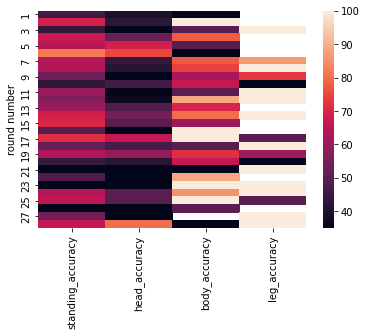

In [27]:
accuracy_heat_map = sapr[['standing_accuracy', 'head_accuracy', 'body_accuracy', 'leg_accuracy']]
accuracy_heat_map.index += 1
sns.heatmap(data=accuracy_heat_map, vmin=35)
plt.ylabel('round number')

# Lightweight Charles

In [28]:
df2 = pd.read_csv('charles_champ_run.csv', error_bad_lines=False)

df2.dropna()

df2['seconds'] = df2.control_time.str.split(':',expand=True)[1]
df2['minutes'] = df2.control_time.str.split(':',expand=True)[0]

df2['seconds'] = df2['seconds'].astype(int)
df2['minutes'] = df2['minutes'].astype(int)

df2['control_time'] = (df2['minutes'] * 60) + df2['seconds']
df2 = df2.drop(columns=['seconds','minutes'])


df2['seconds'] = df2.ending_time.str.split(':',expand=True)[1]
df2['minutes'] = df2.ending_time.str.split(':',expand=True)[0]

df2['seconds'] = df2['seconds'].astype(int)
df2['minutes'] = df2['minutes'].astype(int)

df2['ending_time'] = (df2['minutes'] * 60) + df2['seconds']
df2 = df2.drop(columns=['seconds','minutes'])

# this is wrong AHHHH
# TODO: FIXXXX

df2.loc[df2.round_number != df2.ending_round,'ending_time'] = 300
df2['standing_time'] = df2.ending_time - df2.control_time

print(df2.columns)

Index(['fight_id', 'fight_title', 'winning_fighter_name',
       'losing_fighter_name', 'weight_class', 'method_of_victory',
       'specific_victory_details', 'ending_round', 'ending_time', 'fight_url',
       'unique_round_id', 'unique_fight_id', 'unique_event_id', 'round_number',
       'fighter_name', 'knockdowns', 'total_strikes_landed',
       'total_strikes_attempted', 'takedowns', 'takedowns_attempted',
       'submission_attempts', 'guard_passes', 'reversals', 'control_time',
       'unique_round_id.1', 'unique_fight_id.1', 'unique_event_id.1',
       'round_number.1', 'fighter_name.1', 'significant_strikes_head_landed',
       'significant_strikes_head_attempted', 'significant_strikes_body_landed',
       'significant_strikes_body_attempted', 'significant_strikes_leg_landed',
       'significant_strikes_leg_attempted',
       'significant_strikes_standing_landed',
       'significant_strikes_standing_attempted',
       'significant_strikes_clinch_landed',
       'significant_

In [29]:
df2.head(5)

,fight_id,fight_title,winning_fighter_name,losing_fighter_name,weight_class,method_of_victory,specific_victory_details,ending_round,ending_time,fight_url,unique_round_id,unique_fight_id,unique_event_id,round_number,fighter_name,knockdowns,total_strikes_landed,total_strikes_attempted,takedowns,takedowns_attempted,submission_attempts,guard_passes,reversals,control_time,unique_round_id.1,unique_fight_id.1,unique_event_id.1,round_number.1,fighter_name.1,significant_strikes_head_landed,significant_strikes_head_attempted,significant_strikes_body_landed,significant_strikes_body_attempted,significant_strikes_leg_landed,significant_strikes_leg_attempted,significant_strikes_standing_landed,significant_strikes_standing_attempted,significant_strikes_clinch_landed,significant_strikes_clinch_attempted,significant_strikes_ground_landed,significant_strikes_ground_attempted,event_id,event_title,event_date,event_location,event_attendance,event_url,standing_time
0,23,UFC Fight Night: Lee vs. Oliveira,Charles Oliveira,Kevin Lee,Lightweight,SUB,Guillotine Choke,3,300,e0b323dae5bf4c90,113,23,3,1,Kevin Lee,0,15,29,0,0,0,1.0,1,210,113,23,3,1,Kevin Lee,13,27,2,2,0,0,8,22,0,0,7,7,3,UFC Fight Night: Lee vs. Oliveira,2020-03-14,"Brasilia, Distrito Federa",0,53278852bcd91e11,90
1,23,UFC Fight Night: Lee vs. Oliveira,Charles Oliveira,Kevin Lee,Lightweight,SUB,Guillotine Choke,3,300,e0b323dae5bf4c90,114,23,3,1,Charles Oliveira,0,16,21,0,1,0,0.0,1,11,114,23,3,1,Charles Oliveira,8,12,1,2,4,4,10,15,0,0,3,3,3,UFC Fight Night: Lee vs. Oliveira,2020-03-14,"Brasilia, Distrito Federa",0,53278852bcd91e11,289
2,23,UFC Fight Night: Lee vs. Oliveira,Charles Oliveira,Kevin Lee,Lightweight,SUB,Guillotine Choke,3,300,e0b323dae5bf4c90,115,23,3,2,Kevin Lee,0,36,57,2,2,0,1.0,0,176,115,23,3,2,Kevin Lee,13,34,3,3,0,0,13,29,0,0,3,8,3,UFC Fight Night: Lee vs. Oliveira,2020-03-14,"Brasilia, Distrito Federa",0,53278852bcd91e11,124
3,23,UFC Fight Night: Lee vs. Oliveira,Charles Oliveira,Kevin Lee,Lightweight,SUB,Guillotine Choke,3,300,e0b323dae5bf4c90,116,23,3,2,Charles Oliveira,0,33,47,0,0,1,0.0,0,0,116,23,3,2,Charles Oliveira,19,33,7,7,2,2,23,36,2,2,3,4,3,UFC Fight Night: Lee vs. Oliveira,2020-03-14,"Brasilia, Distrito Federa",0,53278852bcd91e11,300
4,23,UFC Fight Night: Lee vs. Oliveira,Charles Oliveira,Kevin Lee,Lightweight,SUB,Guillotine Choke,3,28,e0b323dae5bf4c90,117,23,3,3,Kevin Lee,0,10,14,0,1,0,0.0,0,4,117,23,3,3,Kevin Lee,9,13,1,1,0,0,10,14,0,0,0,0,3,UFC Fight Night: Lee vs. Oliveira,2020-03-14,"Brasilia, Distrito Federa",0,53278852bcd91e11,24


In [30]:
df2.tail(5)

,fight_id,fight_title,winning_fighter_name,losing_fighter_name,weight_class,method_of_victory,specific_victory_details,ending_round,ending_time,fight_url,unique_round_id,unique_fight_id,unique_event_id,round_number,fighter_name,knockdowns,total_strikes_landed,total_strikes_attempted,takedowns,takedowns_attempted,submission_attempts,guard_passes,reversals,control_time,unique_round_id.1,unique_fight_id.1,unique_event_id.1,round_number.1,fighter_name.1,significant_strikes_head_landed,significant_strikes_head_attempted,significant_strikes_body_landed,significant_strikes_body_attempted,significant_strikes_leg_landed,significant_strikes_leg_attempted,significant_strikes_standing_landed,significant_strikes_standing_attempted,significant_strikes_clinch_landed,significant_strikes_clinch_attempted,significant_strikes_ground_landed,significant_strikes_ground_attempted,event_id,event_title,event_date,event_location,event_attendance,event_url,standing_time
57,8651,UFC 269: Oliveira vs. Poirier,Charles Oliveira,Dustin Poirier,Lightweight,SUB,Rear Naked Choke,3,300,b22eab3aa1522f40,36850,8651,991,1,Dustin Poirier,1,58,91,0,0,0,NaN,0,19,36850,8651,991,1,Dustin Poirier,52,85,2,2,0,0,47,76,5,7,2,4,991,UFC 269: Oliveira vs. Poirier,2021-12-11,"Las Vegas, Nevada, USA",NaN,ef927e4fe2117ab8,281
58,8651,UFC 269: Oliveira vs. Poirier,Charles Oliveira,Dustin Poirier,Lightweight,SUB,Rear Naked Choke,3,300,b22eab3aa1522f40,36851,8651,991,2,Charles Oliveira,0,45,54,0,3,0,NaN,1,267,36851,8651,991,2,Charles Oliveira,19,27,4,5,0,0,2,4,3,3,18,25,991,UFC 269: Oliveira vs. Poirier,2021-12-11,"Las Vegas, Nevada, USA",NaN,ef927e4fe2117ab8,33
59,8651,UFC 269: Oliveira vs. Poirier,Charles Oliveira,Dustin Poirier,Lightweight,SUB,Rear Naked Choke,3,300,b22eab3aa1522f40,36852,8651,991,2,Dustin Poirier,0,10,12,0,0,0,NaN,0,16,36852,8651,991,2,Dustin Poirier,3,5,0,0,0,0,1,2,0,0,2,3,991,UFC 269: Oliveira vs. Poirier,2021-12-11,"Las Vegas, Nevada, USA",NaN,ef927e4fe2117ab8,284
60,8651,UFC 269: Oliveira vs. Poirier,Charles Oliveira,Dustin Poirier,Lightweight,SUB,Rear Naked Choke,3,62,b22eab3aa1522f40,36853,8651,991,3,Charles Oliveira,0,2,7,0,1,3,NaN,0,48,36853,8651,991,3,Charles Oliveira,1,6,1,1,0,0,1,6,1,1,0,0,991,UFC 269: Oliveira vs. Poirier,2021-12-11,"Las Vegas, Nevada, USA",NaN,ef927e4fe2117ab8,14
61,8651,UFC 269: Oliveira vs. Poirier,Charles Oliveira,Dustin Poirier,Lightweight,SUB,Rear Naked Choke,3,62,b22eab3aa1522f40,36854,8651,991,3,Dustin Poirier,0,1,2,0,0,0,NaN,0,0,36854,8651,991,3,Dustin Poirier,1,2,0,0,0,0,1,2,0,0,0,0,991,UFC 269: Oliveira vs. Poirier,2021-12-11,"Las Vegas, Nevada, USA",NaN,ef927e4fe2117ab8,62


In [31]:
# creating the group frame

group_frame_wins = df2[['fighter_name', 'significant_strikes_standing_attempted', 'significant_strikes_standing_landed','significant_strikes_head_attempted','significant_strikes_body_attempted','significant_strikes_leg_attempted', 'significant_strikes_ground_attempted', 'significant_strikes_clinch_attempted', 'knockdowns', 'standing_time' ]].groupby('fighter_name').sum().reset_index()
group_frame_wins.head(3)

,fighter_name,significant_strikes_standing_attempted,significant_strikes_standing_landed,significant_strikes_head_attempted,significant_strikes_body_attempted,significant_strikes_leg_attempted,significant_strikes_ground_attempted,significant_strikes_clinch_attempted,knockdowns,standing_time
0,Charles Oliveira,530,252,495,140,90,107,88,5,4417
1,Christos Giagos,76,16,65,12,3,1,3,0,495
2,Clay Guida,24,8,20,3,2,0,1,0,138


In [32]:
#group_frame_wins.fighter_name = 'Champ Oliveira'
group_frame_wins

,fighter_name,significant_strikes_standing_attempted,significant_strikes_standing_landed,significant_strikes_head_attempted,significant_strikes_body_attempted,significant_strikes_leg_attempted,significant_strikes_ground_attempted,significant_strikes_clinch_attempted,knockdowns,standing_time
0,Charles Oliveira,530,252,495,140,90,107,88,5,4417
1,Christos Giagos,76,16,65,12,3,1,3,0,495
2,Clay Guida,24,8,20,3,2,0,1,0,138
3,Darren Elkins,4,0,4,0,0,0,0,0,14
4,David Teymur,47,23,40,8,5,6,0,1,320
5,Donald Cerrone,34,14,49,4,7,24,2,0,169
6,Dustin Poirier,80,49,92,2,0,7,7,1,627
7,Efrain Escudero,65,7,68,2,6,4,7,0,578
8,Jared Gordon,18,7,16,2,0,0,0,0,81
9,Jim Miller,6,1,7,0,1,2,0,0,103


In [33]:
group_frame_wins['head_ratio'] = group_frame_wins.significant_strikes_head_attempted / (group_frame_wins.significant_strikes_head_attempted + group_frame_wins.significant_strikes_body_attempted + group_frame_wins.significant_strikes_leg_attempted)
group_frame_wins['body_ratio'] = group_frame_wins.significant_strikes_body_attempted / (group_frame_wins.significant_strikes_head_attempted + group_frame_wins.significant_strikes_body_attempted + group_frame_wins.significant_strikes_leg_attempted)
group_frame_wins['leg_ratio'] = group_frame_wins.significant_strikes_leg_attempted / (group_frame_wins.significant_strikes_head_attempted + group_frame_wins.significant_strikes_body_attempted + group_frame_wins.significant_strikes_leg_attempted)


In [34]:
ratio_frame_wins = group_frame_wins[['fighter_name', 'head_ratio', 'body_ratio', 'leg_ratio' ]]
print('Mix Strikes')
ratio_frame_wins

Mix Strikes


,fighter_name,head_ratio,body_ratio,leg_ratio
0,Charles Oliveira,0.682759,0.193103,0.124138
1,Christos Giagos,0.812500,0.150000,0.037500
2,Clay Guida,0.800000,0.120000,0.080000
3,Darren Elkins,1.000000,0.000000,0.000000
4,David Teymur,0.754717,0.150943,0.094340
5,Donald Cerrone,0.816667,0.066667,0.116667
6,Dustin Poirier,0.978723,0.021277,0.000000
7,Efrain Escudero,0.894737,0.026316,0.078947
8,Jared Gordon,0.888889,0.111111,0.000000
9,Jim Miller,0.875000,0.000000,0.125000


In [35]:
#STRIKE LOCATION
location_ratio_wins = group_frame_wins[['fighter_name', 'significant_strikes_standing_attempted', 'significant_strikes_ground_attempted', 'significant_strikes_clinch_attempted']].groupby('fighter_name').sum().reset_index()

In [36]:
location_ratio_wins['standing_ratio'] = location_ratio_wins.significant_strikes_standing_attempted / (location_ratio_wins.significant_strikes_standing_attempted + location_ratio_wins.significant_strikes_ground_attempted + location_ratio_wins.significant_strikes_clinch_attempted)
location_ratio_wins['ground_ratio'] = location_ratio_wins.significant_strikes_ground_attempted / (location_ratio_wins.significant_strikes_standing_attempted + location_ratio_wins.significant_strikes_ground_attempted + location_ratio_wins.significant_strikes_clinch_attempted)
location_ratio_wins['clinch_ratio'] = location_ratio_wins.significant_strikes_clinch_attempted / (location_ratio_wins.significant_strikes_standing_attempted + location_ratio_wins.significant_strikes_ground_attempted + location_ratio_wins.significant_strikes_clinch_attempted)

print('Strike Location')
print(location_ratio_wins[['fighter_name', 'standing_ratio', 'ground_ratio', 'clinch_ratio']])

Strike Location
        fighter_name  standing_ratio  ground_ratio  clinch_ratio
0   Charles Oliveira        0.731034      0.147586      0.121379
1    Christos Giagos        0.950000      0.012500      0.037500
2         Clay Guida        0.960000      0.000000      0.040000
3      Darren Elkins        1.000000      0.000000      0.000000
4       David Teymur        0.886792      0.113208      0.000000
5     Donald Cerrone        0.566667      0.400000      0.033333
6     Dustin Poirier        0.851064      0.074468      0.074468
7    Efrain Escudero        0.855263      0.052632      0.092105
8       Jared Gordon        1.000000      0.000000      0.000000
9         Jim Miller        0.750000      0.250000      0.000000
10         Kevin Lee        0.812500      0.187500      0.000000
11  Michael Chandler        0.472727      0.527273      0.000000
12         Nik Lentz        0.817073      0.073171      0.109756
13       Paul Felder        0.086957      0.826087      0.086957
14     To

In [37]:
# Turn standing time to minutes
group_frame_wins['standing_time']=group_frame_wins.standing_time/60

In [38]:
#SApSM
sapsm_wins = group_frame_wins[['fighter_name', 'significant_strikes_standing_attempted','standing_time', 'knockdowns']].groupby('fighter_name').sum().reset_index()


In [39]:
#SApSM_Ratio
sapsm_wins['SApSM'] = sapsm_wins.significant_strikes_standing_attempted / sapsm_wins.standing_time
print('Standing Attempts per Standing minute')
sapsm_wins

Standing Attempts per Standing minute


,fighter_name,significant_strikes_standing_attempted,standing_time,knockdowns,SApSM
0,Charles Oliveira,530,73.616667,5,7.199457
1,Christos Giagos,76,8.250000,0,9.212121
2,Clay Guida,24,2.300000,0,10.434783
3,Darren Elkins,4,0.233333,0,17.142857
4,David Teymur,47,5.333333,1,8.812500
5,Donald Cerrone,34,2.816667,0,12.071006
6,Dustin Poirier,80,10.450000,1,7.655502
7,Efrain Escudero,65,9.633333,0,6.747405
8,Jared Gordon,18,1.350000,0,13.333333
9,Jim Miller,6,1.716667,0,3.495146


In [40]:
#SLpSM
slpsm_wins = group_frame_wins[['fighter_name', 'significant_strikes_standing_landed','standing_time', 'knockdowns']].groupby('fighter_name').sum().reset_index()


In [41]:
#SLpSM Ratio
slpsm_wins['SLpSM'] = slpsm_wins.significant_strikes_standing_landed / slpsm_wins.standing_time
print('Standing Lands per standing minute')
slpsm_wins

Standing Lands per standing minute


,fighter_name,significant_strikes_standing_landed,standing_time,knockdowns,SLpSM
0,Charles Oliveira,252,73.616667,5,3.423138
1,Christos Giagos,16,8.250000,0,1.939394
2,Clay Guida,8,2.300000,0,3.478261
3,Darren Elkins,0,0.233333,0,0.000000
4,David Teymur,23,5.333333,1,4.312500
5,Donald Cerrone,14,2.816667,0,4.970414
6,Dustin Poirier,49,10.450000,1,4.688995
7,Efrain Escudero,7,9.633333,0,0.726644
8,Jared Gordon,7,1.350000,0,5.185185
9,Jim Miller,1,1.716667,0,0.582524


In [42]:
accuracy_frame_wins = group_frame_wins[['significant_strikes_standing_landed', 'significant_strikes_standing_attempted', 'fighter_name']].groupby('fighter_name').sum().reset_index()

accuracy_frame_wins['standing_accuracy'] = accuracy_frame_wins.significant_strikes_standing_landed/accuracy_frame_wins.significant_strikes_standing_attempted * 100
print('Overall Career Accuracy')
accuracy_frame_wins

Overall Career Accuracy


,fighter_name,significant_strikes_standing_landed,significant_strikes_standing_attempted,standing_accuracy
0,Charles Oliveira,252,530,47.547170
1,Christos Giagos,16,76,21.052632
2,Clay Guida,8,24,33.333333
3,Darren Elkins,0,4,0.000000
4,David Teymur,23,47,48.936170
5,Donald Cerrone,14,34,41.176471
6,Dustin Poirier,49,80,61.250000
7,Efrain Escudero,7,65,10.769231
8,Jared Gordon,7,18,38.888889
9,Jim Miller,1,6,16.666667


In [43]:
# Minutes Standing per Knockdown
kd_frame_wins = group_frame_wins[['standing_time', 'knockdowns', 'fighter_name']].groupby('fighter_name').sum().reset_index()
kd_frame_wins['SMpKD'] = kd_frame_wins.standing_time / kd_frame_wins.knockdowns
print('Standing Minutes per Knockdown')
kd_frame_wins

Standing Minutes per Knockdown


,fighter_name,standing_time,knockdowns,SMpKD
0,Charles Oliveira,73.616667,5,14.723333
1,Christos Giagos,8.250000,0,inf
2,Clay Guida,2.300000,0,inf
3,Darren Elkins,0.233333,0,inf
4,David Teymur,5.333333,1,5.333333
5,Donald Cerrone,2.816667,0,inf
6,Dustin Poirier,10.450000,1,10.450000
7,Efrain Escudero,9.633333,0,inf
8,Jared Gordon,1.350000,0,inf
9,Jim Miller,1.716667,0,inf


In [44]:
kdstrike_frame_wins = group_frame_wins[['significant_strikes_standing_landed', 'knockdowns', 'fighter_name']].groupby('fighter_name').sum().reset_index()

kdstrike_frame_wins['SLpKD'] = kdstrike_frame_wins.significant_strikes_standing_landed / kdstrike_frame_wins.knockdowns
print('Strike Lands per knockdown')
kdstrike_frame_wins

Strike Lands per knockdown


,fighter_name,significant_strikes_standing_landed,knockdowns,SLpKD
0,Charles Oliveira,252,5,50.4
1,Christos Giagos,16,0,inf
2,Clay Guida,8,0,inf
3,Darren Elkins,0,0,NaN
4,David Teymur,23,1,23.0
5,Donald Cerrone,14,0,inf
6,Dustin Poirier,49,1,49.0
7,Efrain Escudero,7,0,inf
8,Jared Gordon,7,0,inf
9,Jim Miller,1,0,inf


In [45]:
#striking accuray per round 

sapr_wins = df2[['total_strikes_landed', 'total_strikes_attempted', 'fighter_name', 'round_number', 'significant_strikes_head_attempted', 'significant_strikes_head_landed', 'significant_strikes_body_attempted', 'significant_strikes_body_landed', 'significant_strikes_leg_attempted', 'significant_strikes_leg_landed', 'standing_time']].groupby(['fighter_name', 'round_number']).mean().reset_index()
sapr_wins['standing_time']=sapr_wins.standing_time/60
sapr_wins['standing_accuracy'] = (sapr_wins.total_strikes_landed / sapr_wins.total_strikes_attempted) * 100

#sapr_wins.fighter_name = 'Champ Oliveira'
# graphs for head accuracy, body accuracy and leg accuracy by round

sapr_wins['head_accuracy']=(sapr_wins.significant_strikes_head_landed/sapr_wins.significant_strikes_head_attempted)*100
sapr_wins['body_accuracy']=(sapr_wins.significant_strikes_body_landed/sapr_wins.significant_strikes_body_attempted)*100
sapr_wins['leg_accuracy']=(sapr_wins.significant_strikes_leg_landed/sapr_wins.significant_strikes_leg_attempted)*100

print('Standing Accuracy by round')
sapr_wins[['fighter_name', 'round_number', 'standing_accuracy', 'head_accuracy', 'body_accuracy', 'leg_accuracy']]


Standing Accuracy by round


,fighter_name,round_number,standing_accuracy,head_accuracy,body_accuracy,leg_accuracy
0,Charles Oliveira,1,55.576923,42.953020,54.761905,77.777778
1,Charles Oliveira,2,70.700637,56.024096,72.727273,85.714286
2,Charles Oliveira,3,62.500000,41.935484,66.666667,83.333333
3,Christos Giagos,1,27.083333,17.948718,60.000000,66.666667
4,Christos Giagos,2,20.588235,23.076923,0.000000,NaN
5,Clay Guida,1,36.000000,20.000000,100.000000,100.000000
6,Darren Elkins,1,0.000000,0.000000,NaN,NaN
7,David Teymur,1,55.102041,43.750000,66.666667,80.000000
8,David Teymur,2,40.000000,25.000000,100.000000,NaN
9,Donald Cerrone,1,50.793651,44.897959,50.000000,85.714286


Text(33.0, 0.5, 'round number')

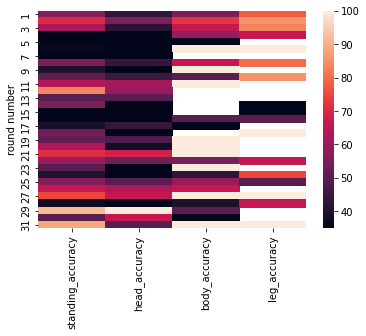

In [46]:

heat_map_ = sapr_wins[['standing_accuracy', 'head_accuracy', 'body_accuracy', 'leg_accuracy']]
heat_map_.index += 1
sns.heatmap(data=heat_map_, vmin=35)
plt.ylabel('round number')

Lets compare charles to historical lightweight and featherweight data. This is used to compare striking by a weightclass basis. First lets inspect striking across Charles' two weight classes featherweight and lightweight

In [47]:
df_fw = pd.read_csv('fw_historical.csv', error_bad_lines=False)
df_fw.dropna()

df_fw = df_fw.loc[df_fw.control_time != '--']


df_fw['seconds'] = df_fw['control_time'].str.split(':',expand=True)[1]
df_fw['minutes'] = df_fw['control_time'].str.split(':',expand=True)[0]

df_fw['seconds'] = df_fw['seconds'].astype(dtype=int)
df_fw['minutes'] = df_fw['minutes'].astype(dtype=int)

df_fw['control_time'] = (df_fw['minutes'] * 60) + df_fw['seconds']
df_fw = df_fw.drop(columns=['seconds','minutes'])


df_fw['seconds'] = df_fw.ending_time.str.split(':',expand=True)[1]
df_fw['minutes'] = df_fw.ending_time.str.split(':',expand=True)[0]

df_fw['seconds'] = df_fw['seconds'].astype(int)
df_fw['minutes'] = df_fw['minutes'].astype(int)

df_fw['ending_time'] = (df_fw['minutes'] * 60) + df_fw['seconds']
df_fw = df_fw.drop(columns=['seconds','minutes'])


df_fw.loc[df_fw.round_number != df_fw.ending_round,'ending_time'] = 300

df_fw['standing_time'] = df_fw.ending_time - df_fw.control_time

print(df_fw.columns)

Index(['fight_id', 'fight_title', 'winning_fighter_name',
       'losing_fighter_name', 'weight_class', 'method_of_victory',
       'specific_victory_details', 'ending_round', 'ending_time', 'fight_url',
       'unique_round_id', 'unique_fight_id', 'unique_event_id', 'round_number',
       'fighter_name', 'knockdowns', 'total_strikes_landed',
       'total_strikes_attempted', 'takedowns', 'takedowns_attempted',
       'submission_attempts', 'guard_passes', 'reversals', 'control_time',
       'unique_round_id.1', 'unique_fight_id.1', 'unique_event_id.1',
       'round_number.1', 'fighter_name.1', 'significant_strikes_head_landed',
       'significant_strikes_head_attempted', 'significant_strikes_body_landed',
       'significant_strikes_body_attempted', 'significant_strikes_leg_landed',
       'significant_strikes_leg_attempted',
       'significant_strikes_standing_landed',
       'significant_strikes_standing_attempted',
       'significant_strikes_clinch_landed',
       'significant_

In [48]:
df_fw.head()

,fight_id,fight_title,winning_fighter_name,losing_fighter_name,weight_class,method_of_victory,specific_victory_details,ending_round,ending_time,fight_url,unique_round_id,unique_fight_id,unique_event_id,round_number,fighter_name,knockdowns,total_strikes_landed,total_strikes_attempted,takedowns,takedowns_attempted,submission_attempts,guard_passes,reversals,control_time,unique_round_id.1,unique_fight_id.1,unique_event_id.1,round_number.1,fighter_name.1,significant_strikes_head_landed,significant_strikes_head_attempted,significant_strikes_body_landed,significant_strikes_body_attempted,significant_strikes_leg_landed,significant_strikes_leg_attempted,significant_strikes_standing_landed,significant_strikes_standing_attempted,significant_strikes_clinch_landed,significant_strikes_clinch_attempted,significant_strikes_ground_landed,significant_strikes_ground_attempted,standing_time
0,710,UFC Fight Night: Belfort vs Henderson,Thiago Tavares,Clay Guida,Featherweight,SUB,Guillotine Choke,1,39,b21e4b6c4126c782,451,710,64,1,Clay Guida,0,3,11,1,1,0,0,0,18,451,710,64,1,Clay Guida,2,10,0,0,1,1,3,11,0,0,0,0,21
1,710,UFC Fight Night: Belfort vs Henderson,Thiago Tavares,Clay Guida,Featherweight,SUB,Guillotine Choke,1,39,b21e4b6c4126c782,452,710,64,1,Thiago Tavares,0,2,7,0,0,1,0,0,1,452,710,64,1,Thiago Tavares,2,7,0,0,0,0,2,7,0,0,0,0,38
2,1913,UFC 199: Rockhold vs. Bisping 2,Brian Ortega,Clay Guida,Featherweight,KO/TKO,Knee,3,300,db1be0ca226d3a2f,453,1913,179,1,Brian Ortega,0,5,29,0,0,0,0,0,0,453,1913,179,1,Brian Ortega,4,27,1,2,0,0,5,29,0,0,0,0,300
3,1913,UFC 199: Rockhold vs. Bisping 2,Brian Ortega,Clay Guida,Featherweight,KO/TKO,Knee,3,300,db1be0ca226d3a2f,454,1913,179,1,Clay Guida,1,25,72,0,3,0,0,0,30,454,1913,179,1,Clay Guida,12,47,1,4,4,4,15,53,2,2,0,0,270
4,1913,UFC 199: Rockhold vs. Bisping 2,Brian Ortega,Clay Guida,Featherweight,KO/TKO,Knee,3,300,db1be0ca226d3a2f,455,1913,179,2,Brian Ortega,0,25,77,0,0,0,0,0,2,455,1913,179,2,Brian Ortega,20,70,5,7,0,0,24,74,1,3,0,0,298


In [49]:
df_fw.tail()

,fight_id,fight_title,winning_fighter_name,losing_fighter_name,weight_class,method_of_victory,specific_victory_details,ending_round,ending_time,fight_url,unique_round_id,unique_fight_id,unique_event_id,round_number,fighter_name,knockdowns,total_strikes_landed,total_strikes_attempted,takedowns,takedowns_attempted,submission_attempts,guard_passes,reversals,control_time,unique_round_id.1,unique_fight_id.1,unique_event_id.1,round_number.1,fighter_name.1,significant_strikes_head_landed,significant_strikes_head_attempted,significant_strikes_body_landed,significant_strikes_body_attempted,significant_strikes_leg_landed,significant_strikes_leg_attempted,significant_strikes_standing_landed,significant_strikes_standing_attempted,significant_strikes_clinch_landed,significant_strikes_clinch_attempted,significant_strikes_ground_landed,significant_strikes_ground_attempted,standing_time
995,1276,UFC Fight Night: Lewis vs. Dos Santos,Grant Dawson,Julian Erosa,Featherweight,U-DEC,NaN,3,300,ddcfa590f4644240,7476,1276,119,2,Julian Erosa,0,38,60,0,0,0,0,0,17,7476,1276,119,2,Julian Erosa,22,39,9,13,3,3,24,43,8,10,2,2,283
996,1276,UFC Fight Night: Lewis vs. Dos Santos,Grant Dawson,Julian Erosa,Featherweight,U-DEC,NaN,3,300,ddcfa590f4644240,7477,1276,119,3,Grant Dawson,0,36,53,1,1,1,3,0,257,7477,1276,119,3,Grant Dawson,19,31,0,0,2,2,4,9,0,0,17,24,43
997,1276,UFC Fight Night: Lewis vs. Dos Santos,Grant Dawson,Julian Erosa,Featherweight,U-DEC,NaN,3,300,ddcfa590f4644240,7478,1276,119,3,Julian Erosa,0,10,18,0,0,0,0,0,0,7478,1276,119,3,Julian Erosa,5,10,0,1,0,0,3,9,0,0,2,2,300
998,2242,UFC Fight Night: Thompson vs. Pettis,Luis Pena,Steven Peterson,Featherweight,U-DEC,NaN,3,300,3812b265afd78186,7485,2242,211,1,Luis Pena,0,21,34,0,1,0,1,1,134,7485,2242,211,1,Luis Pena,13,26,3,3,0,0,7,16,7,11,2,2,166
999,2242,UFC Fight Night: Thompson vs. Pettis,Luis Pena,Steven Peterson,Featherweight,U-DEC,NaN,3,300,3812b265afd78186,7486,2242,211,1,Steven Peterson,0,21,40,1,3,0,0,0,79,7486,2242,211,1,Steven Peterson,2,18,5,7,6,6,10,25,3,6,0,0,221


In [50]:
df_fw.shape

(978, 42)

In [51]:
# creating the group frame

group_frame_fw = df_fw[['fighter_name', 'significant_strikes_standing_attempted', 'significant_strikes_standing_landed','significant_strikes_head_attempted','significant_strikes_body_attempted','significant_strikes_leg_attempted', 'significant_strikes_ground_attempted', 'significant_strikes_clinch_attempted', 'knockdowns', 'standing_time' ]].groupby('fighter_name').sum().reset_index()
group_frame_fw.head(30)

,fighter_name,significant_strikes_standing_attempted,significant_strikes_standing_landed,significant_strikes_head_attempted,significant_strikes_body_attempted,significant_strikes_leg_attempted,significant_strikes_ground_attempted,significant_strikes_clinch_attempted,knockdowns,standing_time
0,Akira Corassani,32,11,24,4,5,0,1,0,229
1,Alex Caceres,580,250,509,87,44,20,40,2,4176
2,Alex White,180,81,137,47,18,8,14,1,917
3,Alexander Volkanovski,513,283,393,58,135,27,46,3,2730
4,Alexandre Franca Nogueira,23,4,21,0,4,0,2,0,481
5,Andre Fili,1055,385,984,84,88,67,34,3,5655
6,Andy Ogle,141,48,117,33,8,16,1,0,672
7,Anistavio Medeiros,18,8,12,0,6,0,0,0,132
8,Arnold Allen,549,230,506,64,37,38,20,2,3721
9,Artem Lobov,813,333,621,102,126,6,30,0,4719


In [52]:
group_frame_fw['head_ratio'] = group_frame_fw.significant_strikes_head_attempted / (group_frame_fw.significant_strikes_head_attempted + group_frame_fw.significant_strikes_body_attempted + group_frame_fw.significant_strikes_leg_attempted)
group_frame_fw['body_ratio'] = group_frame_fw.significant_strikes_body_attempted / (group_frame_fw.significant_strikes_head_attempted + group_frame_fw.significant_strikes_body_attempted + group_frame_fw.significant_strikes_leg_attempted)
group_frame_fw['leg_ratio'] = group_frame_fw.significant_strikes_leg_attempted / (group_frame_fw.significant_strikes_head_attempted + group_frame_fw.significant_strikes_body_attempted + group_frame_fw.significant_strikes_leg_attempted)


In [53]:
ratio_frame_fw = group_frame_fw[['fighter_name', 'head_ratio', 'body_ratio', 'leg_ratio' ]]
print('Mix Strikes')
ratio_frame_fw.head(148)

Mix Strikes


,fighter_name,head_ratio,body_ratio,leg_ratio
0,Akira Corassani,0.727273,0.121212,0.151515
1,Alex Caceres,0.795312,0.135937,0.068750
2,Alex White,0.678218,0.232673,0.089109
3,Alexander Volkanovski,0.670648,0.098976,0.230375
4,Alexandre Franca Nogueira,0.840000,0.000000,0.160000
...,...,...,...,...
143,Yair Rodriguez,0.747021,0.123740,0.129239
144,Yaotzin Meza,0.704918,0.131148,0.163934
145,Yui Chul Nam,0.700000,0.227778,0.072222
146,Zabit Magomedsharipov,0.753425,0.121005,0.125571


In [54]:
print('Average Strike Mix ratiosof Featherweight')
ratio_frame_fw.mean()

Average Strike Mix ratiosof Featherweight


head_ratio    0.783072
body_ratio    0.125097
leg_ratio     0.091831
dtype: float64

In [55]:
#STRIKE LOCATION
location_ratio_fw = group_frame_fw[['fighter_name', 'significant_strikes_standing_attempted', 'significant_strikes_ground_attempted', 'significant_strikes_clinch_attempted']].groupby('fighter_name').sum().reset_index()

In [56]:
location_ratio_fw['standing_ratio'] = location_ratio_fw.significant_strikes_standing_attempted / (location_ratio_fw.significant_strikes_standing_attempted + location_ratio_fw.significant_strikes_ground_attempted + location_ratio_fw.significant_strikes_clinch_attempted)
location_ratio_fw['ground_ratio'] = location_ratio_fw.significant_strikes_ground_attempted / (location_ratio_fw.significant_strikes_standing_attempted + location_ratio_fw.significant_strikes_ground_attempted + location_ratio_fw.significant_strikes_clinch_attempted)
location_ratio_fw['clinch_ratio'] = location_ratio_fw.significant_strikes_clinch_attempted / (location_ratio_fw.significant_strikes_standing_attempted + location_ratio_fw.significant_strikes_ground_attempted + location_ratio_fw.significant_strikes_clinch_attempted)

print('Strike Location')
location_ratio_fw[['fighter_name', 'standing_ratio', 'ground_ratio', 'clinch_ratio']]

Strike Location


,fighter_name,standing_ratio,ground_ratio,clinch_ratio
0,Akira Corassani,0.969697,0.000000,0.030303
1,Alex Caceres,0.906250,0.031250,0.062500
2,Alex White,0.891089,0.039604,0.069307
3,Alexander Volkanovski,0.875427,0.046075,0.078498
4,Alexandre Franca Nogueira,0.920000,0.000000,0.080000
...,...,...,...,...
143,Yair Rodriguez,0.808433,0.143905,0.047663
144,Yaotzin Meza,0.918033,0.000000,0.081967
145,Yui Chul Nam,0.500000,0.183333,0.316667
146,Zabit Magomedsharipov,0.831050,0.127854,0.041096


In [57]:
print('Average FW Fight locations')
location_ratio_fw[['fighter_name', 'standing_ratio', 'ground_ratio', 'clinch_ratio']].mean()


Average FW Fight locations


standing_ratio    0.808510
ground_ratio      0.096566
clinch_ratio      0.094923
dtype: float64

In [58]:
# Turn standing time to minutes
group_frame_fw['standing_time']=group_frame_fw.standing_time/60

In [59]:
#SApSM
sapsm_fw = group_frame_fw[['fighter_name', 'significant_strikes_standing_attempted','standing_time', 'knockdowns']].groupby('fighter_name').sum().reset_index()


In [60]:
#SApSM_Ratio
sapsm_fw['SApSM'] = sapsm_fw.significant_strikes_standing_attempted / sapsm_fw.standing_time
print('Standing Attempts per Standing minute')
sapsm_fw

Standing Attempts per Standing minute


,fighter_name,significant_strikes_standing_attempted,standing_time,knockdowns,SApSM
0,Akira Corassani,32,3.816667,0,8.384279
1,Alex Caceres,580,69.600000,2,8.333333
2,Alex White,180,15.283333,1,11.777535
3,Alexander Volkanovski,513,45.500000,3,11.274725
4,Alexandre Franca Nogueira,23,8.016667,0,2.869023
...,...,...,...,...,...
143,Yair Rodriguez,882,94.166667,3,9.366372
144,Yaotzin Meza,56,12.966667,0,4.318766
145,Yui Chul Nam,90,18.316667,0,4.913558
146,Zabit Magomedsharipov,364,28.833333,0,12.624277


In [61]:
print(f'Average strike Attempts per standing minute of FW: {sapsm_fw.SApSM.mean()}')

Average strike Attempts per standing minute of FW: 8.364267965950392


In [62]:
#SLpSM
slpsm_fw = group_frame_fw[['fighter_name', 'significant_strikes_standing_landed','standing_time', 'knockdowns']].groupby('fighter_name').sum().reset_index()


In [63]:
#SLpSM Ratio
slpsm_fw['SLpSM'] = slpsm_fw.significant_strikes_standing_landed / slpsm_fw.standing_time
print('Standing Lands per standing minute')
slpsm_fw

Standing Lands per standing minute


,fighter_name,significant_strikes_standing_landed,standing_time,knockdowns,SLpSM
0,Akira Corassani,11,3.816667,0,2.882096
1,Alex Caceres,250,69.600000,2,3.591954
2,Alex White,81,15.283333,1,5.299891
3,Alexander Volkanovski,283,45.500000,3,6.219780
4,Alexandre Franca Nogueira,4,8.016667,0,0.498960
...,...,...,...,...,...
143,Yair Rodriguez,366,94.166667,3,3.886726
144,Yaotzin Meza,21,12.966667,0,1.619537
145,Yui Chul Nam,26,18.316667,0,1.419472
146,Zabit Magomedsharipov,159,28.833333,0,5.514451


In [64]:
print(f'Average strike Lands per striking minute of FW: {slpsm_fw.SLpSM.mean()}')

Average strike Lands per striking minute of FW: 3.1198220762499442


In [65]:
accuracy_frame_fw = group_frame_fw[['significant_strikes_standing_landed', 'significant_strikes_standing_attempted', 'fighter_name']].groupby('fighter_name').sum().reset_index()

accuracy_frame_fw['standing_accuracy'] = accuracy_frame_fw.significant_strikes_standing_landed/accuracy_frame_fw.significant_strikes_standing_attempted * 100
print('Overall Career Accuracy')
accuracy_frame_fw

Overall Career Accuracy


,fighter_name,significant_strikes_standing_landed,significant_strikes_standing_attempted,standing_accuracy
0,Akira Corassani,11,32,34.375000
1,Alex Caceres,250,580,43.103448
2,Alex White,81,180,45.000000
3,Alexander Volkanovski,283,513,55.165692
4,Alexandre Franca Nogueira,4,23,17.391304
...,...,...,...,...
143,Yair Rodriguez,366,882,41.496599
144,Yaotzin Meza,21,56,37.500000
145,Yui Chul Nam,26,90,28.888889
146,Zabit Magomedsharipov,159,364,43.681319


<AxesSubplot:xlabel='standing_accuracy', ylabel='Count'>

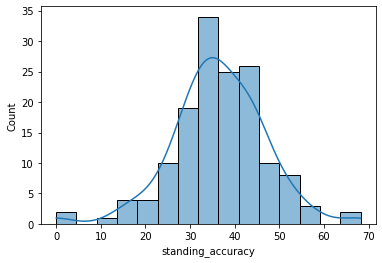

In [66]:
sns.histplot(data=accuracy_frame_fw, x="standing_accuracy", kde=True)

In [67]:
#find the average accuracy for featherweight
perc = "{:.0f}".format(accuracy_frame_fw.standing_accuracy.mean())
perc = int(perc)
print(f'average accuracy for featherweight: {perc}%')


average accuracy for featherweight: 36%


In [68]:
olive_performances = df1[[ 'significant_strikes_standing_attempted', 'significant_strikes_standing_landed', 'unique_round_id', 'event_date', 'winning_fighter_name','losing_fighter_name']]

perc = 0.36
#print(olive_performances.columns)
olive_performances['significant_strikes_standing_attempted'] = olive_performances['significant_strikes_standing_attempted'].astype(int)
olive_performances['expected_strike_lands'] = olive_performances.significant_strikes_standing_attempted * perc

olive_performances.head(20)




<ipython-input-68-ff76b424edf5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olive_performances['significant_strikes_standing_attempted'] = olive_performances['significant_strikes_standing_attempted'].astype(int)
<ipython-input-68-ff76b424edf5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olive_performances['expected_strike_lands'] = olive_performances.significant_strikes_standing_attempted * perc


,significant_strikes_standing_attempted,significant_strikes_standing_landed,unique_round_id,event_date,winning_fighter_name,losing_fighter_name,expected_strike_lands
0,10,5,583,2015-12-19,Charles Oliveira,Myles Jury,3.60
1,16,5,584,2015-12-19,Charles Oliveira,Myles Jury,5.76
2,29,14,847,2015-08-23,Max Holloway,Charles Oliveira,10.44
3,16,4,848,2015-08-23,Max Holloway,Charles Oliveira,5.76
4,5,3,2679,2014-06-28,Charles Oliveira,Hatsu Hioki,1.80
5,2,0,2680,2014-06-28,Charles Oliveira,Hatsu Hioki,0.72
6,12,3,2681,2014-06-28,Charles Oliveira,Hatsu Hioki,4.32
7,12,3,2682,2014-06-28,Charles Oliveira,Hatsu Hioki,4.32
8,11,8,14805,2016-08-27,Anthony Pettis,Charles Oliveira,3.96
9,7,3,14806,2016-08-27,Anthony Pettis,Charles Oliveira,2.52


<AxesSubplot:xlabel='expected_strike_lands', ylabel='significant_strikes_standing_landed'>

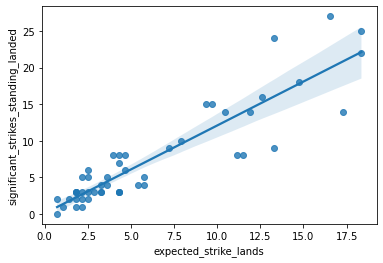

In [69]:
sns.regplot(data=olive_performances, y='significant_strikes_standing_landed', x='expected_strike_lands')

In [70]:
fw_performance = df_fw[[ 'significant_strikes_standing_attempted', 'significant_strikes_standing_landed', 'unique_round_id', 'winning_fighter_name','losing_fighter_name']]

perc = 0.36
#print(fw_performance.columns)
fw_performance['significant_strikes_standing_attempted'] = fw_performance['significant_strikes_standing_attempted'].astype(int)
fw_performance['expected_strike__standing_lands'] = fw_performance.significant_strikes_standing_attempted * perc

fw_performance['expected_strike__standing_lands'].loc[fw_performance['expected_strike__standing_lands'] > 40]

<ipython-input-70-6bddf61ecece>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fw_performance['significant_strikes_standing_attempted'] = fw_performance['significant_strikes_standing_attempted'].astype(int)
<ipython-input-70-6bddf61ecece>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fw_performance['expected_strike__standing_lands'] = fw_performance.significant_strikes_standing_attempted * perc


154    41.76
224    45.36
228    67.68
366    43.20
368    47.52
369    43.20
370    61.20
371    50.04
Name: expected_strike__standing_lands, dtype: float64

Expected Strikes is Strike Attempts for every round multiplied by the Average standing accuracy for Featherweight which is 36%

Text(0.5, 1.0, 'Expected strike lands vs. Actual standing lands')

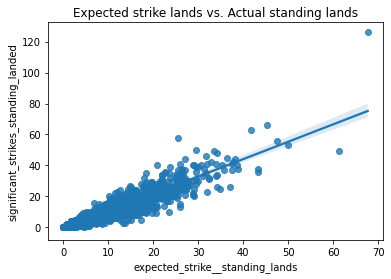

In [71]:
sns.regplot(data=fw_performance, y='significant_strikes_standing_landed', x='expected_strike__standing_lands')
plt.title('Expected strike lands vs. Actual standing lands')

<AxesSubplot:xlabel='significant_strikes_standing_attempted', ylabel='Count'>

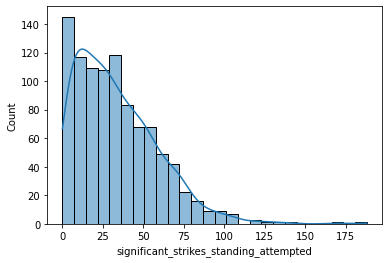

In [72]:
sns.histplot(data=fw_performance, x="significant_strikes_standing_attempted", kde=True, )
#Numbers are lower because these are rounds performances

In [73]:
fw_performance.loc[ fw_performance.significant_strikes_standing_attempted == fw_performance.significant_strikes_standing_attempted.max()]

,significant_strikes_standing_attempted,significant_strikes_standing_landed,unique_round_id,winning_fighter_name,losing_fighter_name,expected_strike__standing_lands
228,188,126,2653,Max Holloway,Brian Ortega,67.68


<AxesSubplot:xlabel='significant_strikes_standing_attempted'>

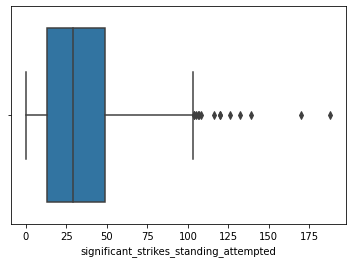

In [74]:
sns.boxplot(data=fw_performance, x="significant_strikes_standing_attempted")

In [75]:
expected_by_target = df_fw[[ 'significant_strikes_head_landed', 'significant_strikes_head_attempted', 'significant_strikes_body_landed', 'significant_strikes_body_attempted', 'significant_strikes_leg_landed','significant_strikes_leg_attempted', 'takedowns_attempted', 'takedowns', 'unique_round_id', 'winning_fighter_name','losing_fighter_name']]

expected_by_target['head_accuracy_fw'] = expected_by_target.significant_strikes_head_landed / expected_by_target.significant_strikes_head_attempted * 100
expected_by_target['body_accuracy_fw'] = expected_by_target.significant_strikes_body_landed / expected_by_target.significant_strikes_body_attempted * 100
expected_by_target['leg_accuracy_fw'] = expected_by_target.significant_strikes_leg_landed / expected_by_target.significant_strikes_leg_attempted * 100


expected_by_target = expected_by_target.dropna()
expected_by_target = expected_by_target.reset_index(drop=True)

head_accuracy_avg = expected_by_target['head_accuracy_fw'].mean()
body_accuracy_avg = expected_by_target['body_accuracy_fw'].mean()
leg_accuracy_avg = expected_by_target['leg_accuracy_fw'].mean()



expected_by_target.head(20)


<ipython-input-75-3a34e8a2caf5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expected_by_target['head_accuracy_fw'] = expected_by_target.significant_strikes_head_landed / expected_by_target.significant_strikes_head_attempted * 100
<ipython-input-75-3a34e8a2caf5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expected_by_target['body_accuracy_fw'] = expected_by_target.significant_strikes_body_landed / expected_by_target.significant_strikes_body_attempted * 100
<ipython-input-75-3a34e8a2caf5>:5: Setting

,significant_strikes_head_landed,significant_strikes_head_attempted,significant_strikes_body_landed,significant_strikes_body_attempted,significant_strikes_leg_landed,significant_strikes_leg_attempted,takedowns_attempted,takedowns,unique_round_id,winning_fighter_name,losing_fighter_name,head_accuracy_fw,body_accuracy_fw,leg_accuracy_fw
0,12,47,1,4,4,4,3,0,454,Brian Ortega,Clay Guida,25.531915,25.000000,100.000000
1,16,62,6,7,3,3,3,0,456,Brian Ortega,Clay Guida,25.806452,85.714286,100.000000
2,28,78,3,4,1,1,0,0,457,Brian Ortega,Clay Guida,35.897436,75.000000,100.000000
3,18,43,9,13,12,14,3,0,465,Yair Rodriguez,Jeremy Stephens,41.860465,69.230769,85.714286
4,3,14,4,4,4,6,0,0,466,Yair Rodriguez,Jeremy Stephens,21.428571,100.000000,66.666667
5,37,67,2,4,2,2,0,0,467,Yair Rodriguez,Jeremy Stephens,55.223881,50.000000,100.000000
6,9,19,2,2,0,1,1,1,468,Yair Rodriguez,Jeremy Stephens,47.368421,100.000000,0.000000
7,10,17,3,6,3,4,0,0,469,Yair Rodriguez,Jeremy Stephens,58.823529,50.000000,75.000000
8,23,43,4,4,1,2,3,2,470,Yair Rodriguez,Jeremy Stephens,53.488372,100.000000,50.000000
9,21,55,3,3,5,5,0,0,473,Jose Aldo,Jeremy Stephens,38.181818,100.000000,100.000000


<AxesSubplot:xlabel='significant_strikes_head_attempted', ylabel='Count'>

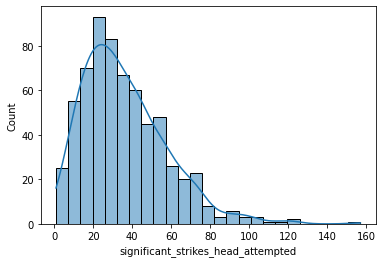

In [76]:
sns.histplot(data=expected_by_target, x="significant_strikes_head_attempted",kde=True)

<AxesSubplot:xlabel='significant_strikes_head_landed', ylabel='significant_strikes_head_attempted'>

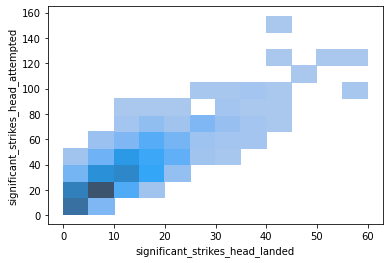

In [77]:
sns.histplot(data=expected_by_target, x="significant_strikes_head_landed", y="significant_strikes_head_attempted" , bins=12)

<AxesSubplot:xlabel='significant_strikes_head_attempted', ylabel='significant_strikes_head_landed'>

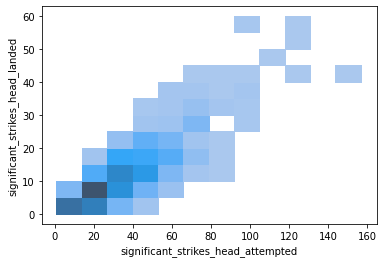

In [78]:
sns.histplot(data=expected_by_target, x="significant_strikes_head_attempted", y="significant_strikes_head_landed" , bins=12)

<AxesSubplot:xlabel='takedowns_attempted', ylabel='significant_strikes_head_attempted'>

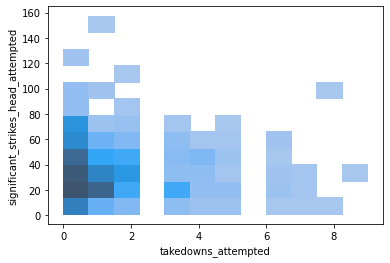

In [79]:
sns.histplot(data=expected_by_target, x="takedowns_attempted", y="significant_strikes_head_attempted" , bins=12)

<AxesSubplot:xlabel='takedowns', ylabel='significant_strikes_head_attempted'>

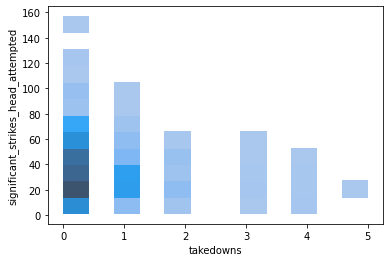

In [80]:
sns.histplot(data=expected_by_target, x="takedowns", y="significant_strikes_head_attempted" , bins=12)

<AxesSubplot:xlabel='takedowns', ylabel='significant_strikes_head_attempted'>

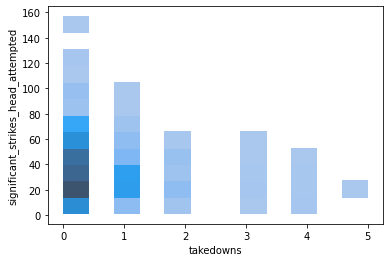

In [81]:
sns.histplot(data=expected_by_target, x="takedowns", y="significant_strikes_head_attempted" , bins=12)

<AxesSubplot:xlabel='takedowns_attempted', ylabel='significant_strikes_head_landed'>

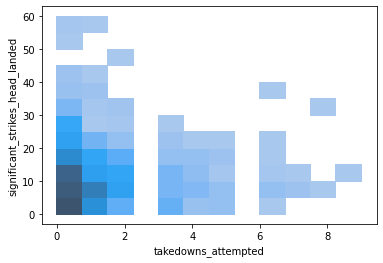

In [82]:
sns.histplot(data=expected_by_target, x="takedowns_attempted", y="significant_strikes_head_landed" , bins=12)

<AxesSubplot:xlabel='head_accuracy_fw', ylabel='Count'>

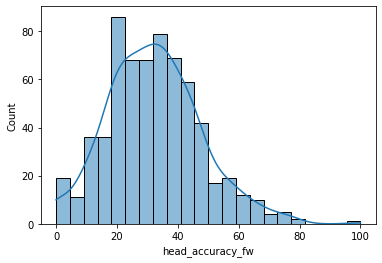

In [83]:
sns.histplot(data=expected_by_target, x="head_accuracy_fw", kde=True)

<AxesSubplot:xlabel='head_accuracy_fw'>

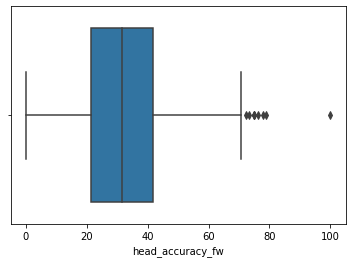

In [84]:
sns.boxplot(data=expected_by_target, x="head_accuracy_fw")

<AxesSubplot:xlabel='significant_strikes_body_attempted', ylabel='Count'>

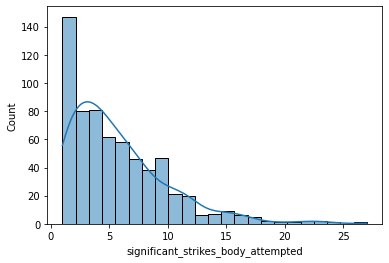

In [85]:
sns.histplot(data=expected_by_target, x="significant_strikes_body_attempted", kde=True)

<AxesSubplot:xlabel='takedowns', ylabel='significant_strikes_body_attempted'>

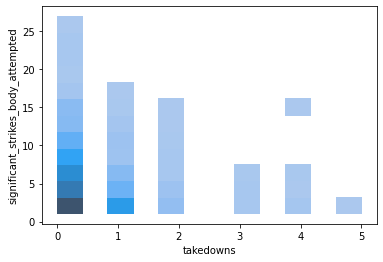

In [86]:
sns.histplot(data=expected_by_target, x="takedowns", y="significant_strikes_body_attempted" , bins=12)

<AxesSubplot:xlabel='takedowns', ylabel='significant_strikes_body_landed'>

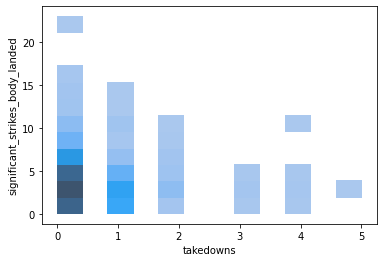

In [87]:
sns.histplot(data=expected_by_target, x="takedowns", y="significant_strikes_body_landed" , bins=12)

<AxesSubplot:xlabel='body_accuracy_fw', ylabel='Count'>

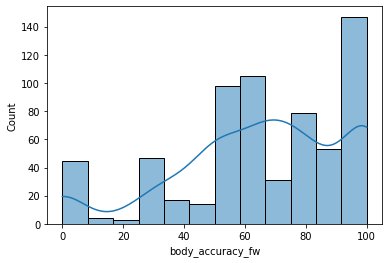

In [88]:
sns.histplot(data=expected_by_target, x="body_accuracy_fw", kde=True)

<AxesSubplot:xlabel='body_accuracy_fw'>

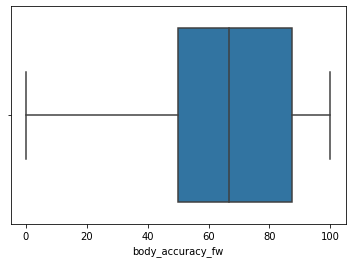

In [89]:
sns.boxplot(data=expected_by_target, x="body_accuracy_fw")

<AxesSubplot:xlabel='leg_accuracy_fw', ylabel='Count'>

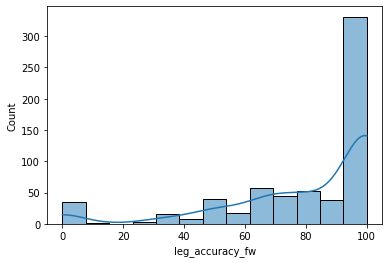

In [90]:
sns.histplot(data=expected_by_target, x="leg_accuracy_fw", kde=True)

<AxesSubplot:xlabel='leg_accuracy_fw'>

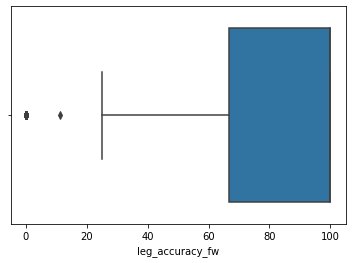

In [91]:
sns.boxplot(data=expected_by_target, x="leg_accuracy_fw")

In [92]:
expected_by_target.body_accuracy_fw.median()

66.66666666666666

In [93]:
print(head_accuracy_avg)
print(body_accuracy_avg)
print(leg_accuracy_avg)

#print(fw_performance.columns)
expected_by_target['significant_strikes_head_attempted'] = expected_by_target['significant_strikes_head_attempted'].astype(int)
expected_by_target['expected_head_lands'] = expected_by_target.significant_strikes_head_attempted * (head_accuracy_avg * 0.01)


expected_by_target['significant_strikes_body_attempted'] = expected_by_target['significant_strikes_body_attempted'].astype(int)
expected_by_target['expected_body_lands'] = expected_by_target.significant_strikes_body_attempted * (body_accuracy_avg * 0.01)


expected_by_target['significant_strikes_leg_attempted'] = expected_by_target['significant_strikes_leg_attempted'].astype(int)
expected_by_target['expected_leg_lands'] = expected_by_target.significant_strikes_leg_attempted * (leg_accuracy_avg * 0.01)

expected_by_target.head(20)

32.26032561486461
65.63404771975117
80.32315830824356


,significant_strikes_head_landed,significant_strikes_head_attempted,significant_strikes_body_landed,significant_strikes_body_attempted,significant_strikes_leg_landed,significant_strikes_leg_attempted,takedowns_attempted,takedowns,unique_round_id,winning_fighter_name,losing_fighter_name,head_accuracy_fw,body_accuracy_fw,leg_accuracy_fw,expected_head_lands,expected_body_lands,expected_leg_lands
0,12,47,1,4,4,4,3,0,454,Brian Ortega,Clay Guida,25.531915,25.000000,100.000000,15.162353,2.625362,3.212926
1,16,62,6,7,3,3,3,0,456,Brian Ortega,Clay Guida,25.806452,85.714286,100.000000,20.001402,4.594383,2.409695
2,28,78,3,4,1,1,0,0,457,Brian Ortega,Clay Guida,35.897436,75.000000,100.000000,25.163054,2.625362,0.803232
3,18,43,9,13,12,14,3,0,465,Yair Rodriguez,Jeremy Stephens,41.860465,69.230769,85.714286,13.871940,8.532426,11.245242
4,3,14,4,4,4,6,0,0,466,Yair Rodriguez,Jeremy Stephens,21.428571,100.000000,66.666667,4.516446,2.625362,4.819389
5,37,67,2,4,2,2,0,0,467,Yair Rodriguez,Jeremy Stephens,55.223881,50.000000,100.000000,21.614418,2.625362,1.606463
6,9,19,2,2,0,1,1,1,468,Yair Rodriguez,Jeremy Stephens,47.368421,100.000000,0.000000,6.129462,1.312681,0.803232
7,10,17,3,6,3,4,0,0,469,Yair Rodriguez,Jeremy Stephens,58.823529,50.000000,75.000000,5.484255,3.938043,3.212926
8,23,43,4,4,1,2,3,2,470,Yair Rodriguez,Jeremy Stephens,53.488372,100.000000,50.000000,13.871940,2.625362,1.606463
9,21,55,3,3,5,5,0,0,473,Jose Aldo,Jeremy Stephens,38.181818,100.000000,100.000000,17.743179,1.969021,4.016158


Text(0.5, 1.0, 'Expected Head strike lands vs. Actual Head lands')

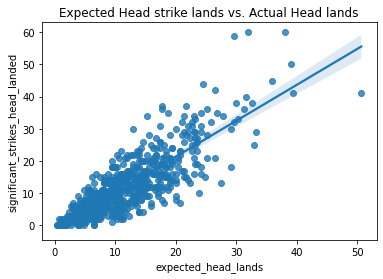

In [94]:
sns.regplot(data=expected_by_target, y='significant_strikes_head_landed', x='expected_head_lands')
plt.title('Expected Head strike lands vs. Actual Head lands')

Text(0.5, 1.0, 'Expected Body strike lands vs. Actual Body lands')

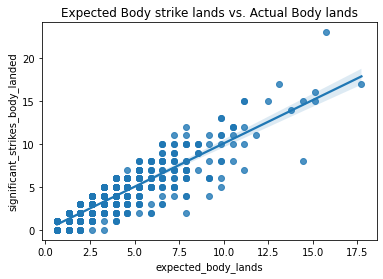

In [95]:
sns.regplot(data=expected_by_target, y='significant_strikes_body_landed', x='expected_body_lands')
plt.title('Expected Body strike lands vs. Actual Body lands')

Text(0.5, 1.0, 'Expected leg strike lands vs. Actual leg lands')

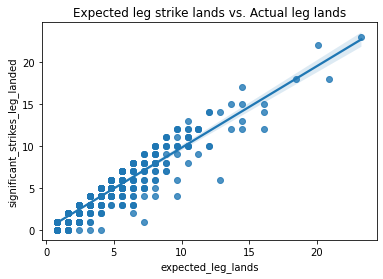

In [96]:
sns.regplot(data=expected_by_target, y='significant_strikes_leg_landed', x='expected_leg_lands')
plt.title('Expected leg strike lands vs. Actual leg lands')

In [97]:
expected_grappling = df_fw[[ 'takedowns', 'takedowns_attempted','unique_round_id', 'winning_fighter_name','losing_fighter_name']]

expected_grappling['takedown_accuracy_fw'] = expected_grappling.takedowns / expected_grappling.takedowns_attempted

expected_grappling = expected_grappling.dropna()
expected_grappling = expected_grappling.reset_index(drop=True)


takedown_accuracy_avg_fw = expected_grappling['takedown_accuracy_fw'].mean()

expected_grappling.head(20)

<ipython-input-97-ac90461f58ce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expected_grappling['takedown_accuracy_fw'] = expected_grappling.takedowns / expected_grappling.takedowns_attempted


,takedowns,takedowns_attempted,unique_round_id,winning_fighter_name,losing_fighter_name,takedown_accuracy_fw
0,1,1,451,Thiago Tavares,Clay Guida,1.000000
1,0,3,454,Brian Ortega,Clay Guida,0.000000
2,0,3,456,Brian Ortega,Clay Guida,0.000000
3,0,3,465,Yair Rodriguez,Jeremy Stephens,0.000000
4,1,1,468,Yair Rodriguez,Jeremy Stephens,1.000000
5,2,3,470,Yair Rodriguez,Jeremy Stephens,0.666667
6,1,1,476,Renato Moicano,Jeremy Stephens,1.000000
7,0,1,477,Renato Moicano,Jeremy Stephens,0.000000
8,0,1,478,Renato Moicano,Jeremy Stephens,0.000000
9,1,3,480,Renato Moicano,Jeremy Stephens,0.333333


In [98]:
print(takedown_accuracy_avg_fw)

0.3954921830628046


In [99]:
expected_grappling['takedowns_attempted'] = expected_grappling['takedowns_attempted'].astype(int)
expected_grappling['expected_takedowns'] = expected_grappling.takedowns_attempted * takedown_accuracy_avg_fw

expected_grappling.head(20)

,takedowns,takedowns_attempted,unique_round_id,winning_fighter_name,losing_fighter_name,takedown_accuracy_fw,expected_takedowns
0,1,1,451,Thiago Tavares,Clay Guida,1.000000,0.395492
1,0,3,454,Brian Ortega,Clay Guida,0.000000,1.186477
2,0,3,456,Brian Ortega,Clay Guida,0.000000,1.186477
3,0,3,465,Yair Rodriguez,Jeremy Stephens,0.000000,1.186477
4,1,1,468,Yair Rodriguez,Jeremy Stephens,1.000000,0.395492
5,2,3,470,Yair Rodriguez,Jeremy Stephens,0.666667,1.186477
6,1,1,476,Renato Moicano,Jeremy Stephens,1.000000,0.395492
7,0,1,477,Renato Moicano,Jeremy Stephens,0.000000,0.395492
8,0,1,478,Renato Moicano,Jeremy Stephens,0.000000,0.395492
9,1,3,480,Renato Moicano,Jeremy Stephens,0.333333,1.186477


<AxesSubplot:xlabel='takedowns_attempted', ylabel='Count'>

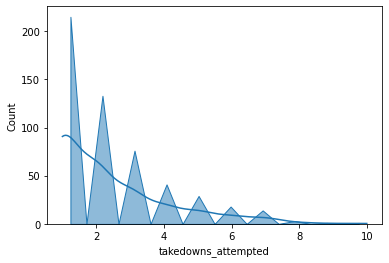

In [100]:
sns.histplot(data=expected_grappling, x="takedowns_attempted", kde=True, element="poly")

Text(0.5, 1.0, 'Expected leg strike lands vs. Actual leg lands')

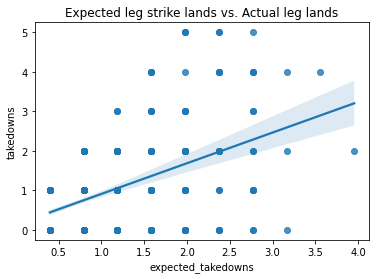

In [101]:
sns.regplot(data=expected_grappling, y='takedowns', x='expected_takedowns')
plt.title('Expected leg strike lands vs. Actual leg lands')

In [102]:
expected_by_location = df_fw[[ 'significant_strikes_clinch_landed', 'significant_strikes_clinch_attempted', 'significant_strikes_ground_landed', 'significant_strikes_ground_attempted', 'unique_round_id', 'winning_fighter_name','losing_fighter_name']]



expected_by_location['clinch_accuracy_fw'] = expected_by_location.significant_strikes_clinch_landed / expected_by_location.significant_strikes_clinch_attempted
expected_by_location['ground_accuracy_fw'] = expected_by_location.significant_strikes_ground_landed / expected_by_location.significant_strikes_ground_attempted


clinch_accuracy_avg = expected_by_location['clinch_accuracy_fw'].mean()
ground_accuracy_avg = expected_by_location['ground_accuracy_fw'].mean()

print(clinch_accuracy_avg)
print(ground_accuracy_avg)

expected_by_location = expected_by_location.dropna()
expected_by_location = expected_by_location.reset_index(drop=True)


expected_by_location['expected_clinch_strikes'] = expected_by_location.significant_strikes_clinch_attempted * clinch_accuracy_avg
expected_by_location['expected_ground_strikes'] = expected_by_location.significant_strikes_ground_attempted * ground_accuracy_avg

expected_by_location.head(20)

0.6447571081990285
0.6938850745173357


<ipython-input-102-0b78423dfe8e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expected_by_location['clinch_accuracy_fw'] = expected_by_location.significant_strikes_clinch_landed / expected_by_location.significant_strikes_clinch_attempted
<ipython-input-102-0b78423dfe8e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expected_by_location['ground_accuracy_fw'] = expected_by_location.significant_strikes_ground_landed / expected_by_location.significant_strikes_ground_attempted


,significant_strikes_clinch_landed,significant_strikes_clinch_attempted,significant_strikes_ground_landed,significant_strikes_ground_attempted,unique_round_id,winning_fighter_name,losing_fighter_name,clinch_accuracy_fw,ground_accuracy_fw,expected_clinch_strikes,expected_ground_strikes
0,4,8,1,1,465,Yair Rodriguez,Jeremy Stephens,0.500000,1.000000,5.158057,0.693885
1,2,2,34,58,467,Yair Rodriguez,Jeremy Stephens,1.000000,0.586207,1.289514,40.245334
2,4,7,6,7,468,Yair Rodriguez,Jeremy Stephens,0.571429,0.857143,4.513300,4.857196
3,0,1,19,26,470,Yair Rodriguez,Jeremy Stephens,0.000000,0.730769,0.644757,18.041012
4,1,1,12,21,473,Jose Aldo,Jeremy Stephens,1.000000,0.571429,0.644757,14.571587
5,2,3,10,11,531,Max Holloway,Ricardo Lamas,0.666667,0.909091,1.934271,7.632736
6,5,7,17,18,535,Chad Mendes,Ricardo Lamas,0.714286,0.944444,4.513300,12.489931
7,8,11,1,3,538,Mirsad Bektic,Ricardo Lamas,0.727273,0.333333,7.092328,2.081655
8,4,6,2,3,587,Jeremy Stephens,Gilbert Melendez,0.666667,0.666667,3.868543,2.081655
9,1,1,0,1,590,Jeremy Stephens,Gilbert Melendez,1.000000,0.000000,0.644757,0.693885


<AxesSubplot:xlabel='clinch_accuracy_fw', ylabel='Count'>

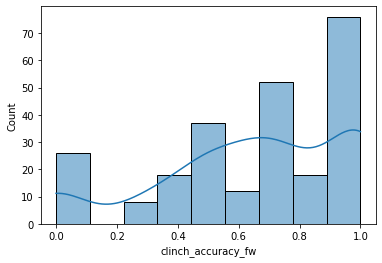

In [103]:
sns.histplot(data=expected_by_location, x="clinch_accuracy_fw", kde=True)

<AxesSubplot:xlabel='ground_accuracy_fw', ylabel='Count'>

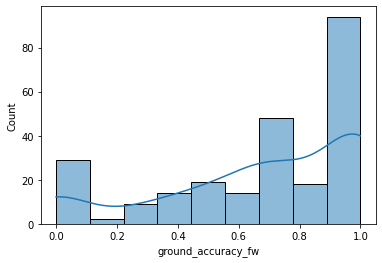

In [104]:
sns.histplot(data=expected_by_location, x="ground_accuracy_fw", kde=True)

<AxesSubplot:xlabel='significant_strikes_clinch_attempted', ylabel='Count'>

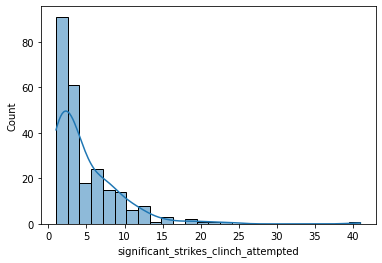

In [105]:
sns.histplot(data=expected_by_location, x="significant_strikes_clinch_attempted", kde=True)

<AxesSubplot:xlabel='significant_strikes_clinch_landed', ylabel='Count'>

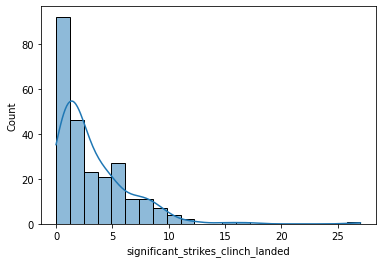

In [106]:
sns.histplot(data=expected_by_location, x="significant_strikes_clinch_landed", kde=True)

<AxesSubplot:xlabel='significant_strikes_ground_attempted', ylabel='Count'>

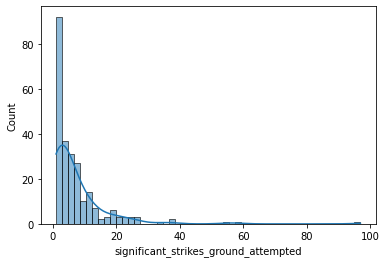

In [107]:
sns.histplot(data=expected_by_location, x="significant_strikes_ground_attempted", kde=True)

<AxesSubplot:xlabel='significant_strikes_ground_landed', ylabel='Count'>

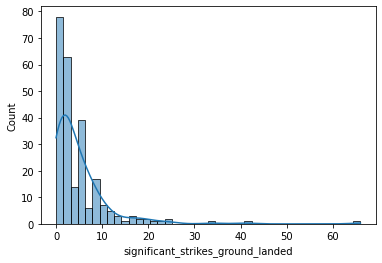

In [108]:
sns.histplot(data=expected_by_location, x="significant_strikes_ground_landed", kde=True)

Text(0.5, 1.0, 'Expected Ground strike lands vs. Actual Ground Strikes')

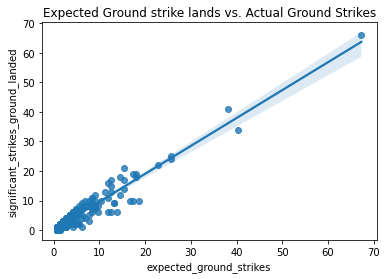

In [109]:
sns.regplot(data=expected_by_location, y='significant_strikes_ground_landed', x='expected_ground_strikes')
plt.title('Expected Ground strike lands vs. Actual Ground Strikes')

Text(0.5, 1.0, 'Expected Ground strike lands vs. Actual Ground Strikes')

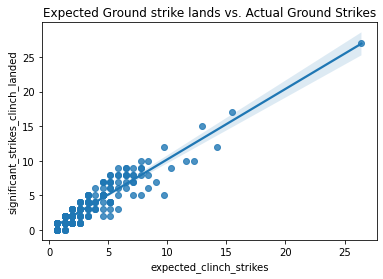

In [110]:
sns.regplot(data=expected_by_location, y='significant_strikes_clinch_landed', x='expected_clinch_strikes')
plt.title('Expected Ground strike lands vs. Actual Ground Strikes')

Examine by location of strikes i.e Standing (all done), Ground, and Clinch

In [111]:
df_fw.columns

Index(['fight_id', 'fight_title', 'winning_fighter_name',
       'losing_fighter_name', 'weight_class', 'method_of_victory',
       'specific_victory_details', 'ending_round', 'ending_time', 'fight_url',
       'unique_round_id', 'unique_fight_id', 'unique_event_id', 'round_number',
       'fighter_name', 'knockdowns', 'total_strikes_landed',
       'total_strikes_attempted', 'takedowns', 'takedowns_attempted',
       'submission_attempts', 'guard_passes', 'reversals', 'control_time',
       'unique_round_id.1', 'unique_fight_id.1', 'unique_event_id.1',
       'round_number.1', 'fighter_name.1', 'significant_strikes_head_landed',
       'significant_strikes_head_attempted', 'significant_strikes_body_landed',
       'significant_strikes_body_attempted', 'significant_strikes_leg_landed',
       'significant_strikes_leg_attempted',
       'significant_strikes_standing_landed',
       'significant_strikes_standing_attempted',
       'significant_strikes_clinch_landed',
       'significant_

In [112]:
#striking accuray per round 

sapr_fw = df_fw[['total_strikes_landed', 'total_strikes_attempted', 'fighter_name', 'round_number', 'significant_strikes_head_attempted', 'significant_strikes_head_landed', 'significant_strikes_body_attempted', 'significant_strikes_body_landed', 'significant_strikes_leg_attempted', 'significant_strikes_leg_landed', 'standing_time']].groupby(['fighter_name', 'round_number']).mean().reset_index()
sapr_fw['standing_time']=sapr_fw.standing_time/60
sapr_fw['standing_accuracy'] = (sapr_fw.total_strikes_landed / sapr_fw.total_strikes_attempted) * 100

# graphs for head accuracy, body accuracy and leg accuracy by round

sapr_fw['head_accuracy']=(sapr_fw.significant_strikes_head_landed/sapr_fw.significant_strikes_head_attempted)*100
sapr_fw['body_accuracy']=(sapr_fw.significant_strikes_body_landed/sapr_fw.significant_strikes_body_attempted)*100
sapr_fw['leg_accuracy']=(sapr_fw.significant_strikes_leg_landed/sapr_fw.significant_strikes_leg_attempted)*100

print('Standing Accuracy by round')
sapr_fw[['fighter_name', 'round_number', 'standing_accuracy', 'head_accuracy', 'body_accuracy', 'leg_accuracy']]


Standing Accuracy by round


,fighter_name,round_number,standing_accuracy,head_accuracy,body_accuracy,leg_accuracy
0,Akira Corassani,1,35.294118,25.000000,25.000000,80.000000
1,Alex Caceres,1,52.914798,39.490446,81.250000,86.363636
2,Alex Caceres,2,45.408163,36.486486,70.967742,75.000000
3,Alex Caceres,3,47.445255,40.740741,80.000000,75.000000
4,Alex Caceres,4,26.415094,24.489796,66.666667,0.000000
...,...,...,...,...,...,...
411,Yui Chul Nam,3,50.617284,21.951220,50.000000,80.000000
412,Zabit Magomedsharipov,1,53.669725,40.140845,60.000000,90.909091
413,Zabit Magomedsharipov,2,56.730769,43.511450,43.750000,100.000000
414,Zabit Magomedsharipov,3,47.191011,35.087719,28.571429,92.857143


In [113]:
df_lw = pd.read_csv('lw_historical.csv', error_bad_lines=False)
df_lw.dropna()

df_lw = df_lw.loc[df_lw.control_time != '--']


df_lw['seconds'] = df_lw['control_time'].str.split(':',expand=True)[1]
df_lw['minutes'] = df_lw['control_time'].str.split(':',expand=True)[0]

df_lw['seconds'] = df_lw['seconds'].astype(dtype=int)
df_lw['minutes'] = df_lw['minutes'].astype(dtype=int)

df_lw['control_time'] = (df_lw['minutes'] * 60) + df_lw['seconds']
df_lw = df_lw.drop(columns=['seconds','minutes'])


df_lw['seconds'] = df_lw.ending_time.str.split(':',expand=True)[1]
df_lw['minutes'] = df_lw.ending_time.str.split(':',expand=True)[0]

df_lw['seconds'] = df_lw['seconds'].astype(int)
df_lw['minutes'] = df_lw['minutes'].astype(int)

df_lw['ending_time'] = (df_lw['minutes'] * 60) + df_lw['seconds']
df_lw = df_lw.drop(columns=['seconds','minutes'])

df_lw['standing_time'] = df_lw.ending_time - df_lw.control_time

df_lw.loc[df_lw.round_number != df_lw.ending_round,'ending_time'] = 300
print(df_lw.columns)

Index(['fight_id', 'fight_title', 'winning_fighter_name',
       'losing_fighter_name', 'weight_class', 'method_of_victory',
       'specific_victory_details', 'ending_round', 'ending_time', 'fight_url',
       'unique_round_id', 'unique_fight_id', 'unique_event_id', 'round_number',
       'fighter_name', 'knockdowns', 'total_strikes_landed',
       'total_strikes_attempted', 'takedowns', 'takedowns_attempted',
       'submission_attempts', 'guard_passes', 'reversals', 'control_time',
       'unique_round_id.1', 'unique_fight_id.1', 'unique_event_id.1',
       'round_number.1', 'fighter_name.1', 'significant_strikes_head_landed',
       'significant_strikes_head_attempted', 'significant_strikes_body_landed',
       'significant_strikes_body_attempted', 'significant_strikes_leg_landed',
       'significant_strikes_leg_attempted',
       'significant_strikes_standing_landed',
       'significant_strikes_standing_attempted',
       'significant_strikes_clinch_landed',
       'significant_

In [114]:
df_lw.head()

,fight_id,fight_title,winning_fighter_name,losing_fighter_name,weight_class,method_of_victory,specific_victory_details,ending_round,ending_time,fight_url,unique_round_id,unique_fight_id,unique_event_id,round_number,fighter_name,knockdowns,total_strikes_landed,total_strikes_attempted,takedowns,takedowns_attempted,submission_attempts,guard_passes,reversals,control_time,unique_round_id.1,unique_fight_id.1,unique_event_id.1,round_number.1,fighter_name.1,significant_strikes_head_landed,significant_strikes_head_attempted,significant_strikes_body_landed,significant_strikes_body_attempted,significant_strikes_leg_landed,significant_strikes_leg_attempted,significant_strikes_standing_landed,significant_strikes_standing_attempted,significant_strikes_clinch_landed,significant_strikes_clinch_attempted,significant_strikes_ground_landed,significant_strikes_ground_attempted,standing_time
0,2089,UFC 226: Miocic vs. Cormier,Anthony Pettis,Michael Chiesa,Lightweight,SUB,Triangle Choke,2,300,d3f26e0fbf694375,1,2089,197,1,Michael Chiesa,0,17,32,2,6,0,1,0,129,1,2089,197,1,Michael Chiesa,4,17,6,6,1,1,7,19,3,3,1,2,-77
1,2089,UFC 226: Miocic vs. Cormier,Anthony Pettis,Michael Chiesa,Lightweight,SUB,Triangle Choke,2,300,d3f26e0fbf694375,2,2089,197,1,Anthony Pettis,0,11,21,0,0,0,0,0,58,2,2089,197,1,Anthony Pettis,2,10,3,4,2,3,5,14,1,1,1,2,-6
2,2089,UFC 226: Miocic vs. Cormier,Anthony Pettis,Michael Chiesa,Lightweight,SUB,Triangle Choke,2,52,d3f26e0fbf694375,3,2089,197,2,Michael Chiesa,0,2,3,0,0,0,0,0,29,3,2089,197,2,Michael Chiesa,0,0,1,1,0,1,1,2,0,0,0,0,23
3,2089,UFC 226: Miocic vs. Cormier,Anthony Pettis,Michael Chiesa,Lightweight,SUB,Triangle Choke,2,52,d3f26e0fbf694375,4,2089,197,2,Anthony Pettis,0,2,5,0,0,2,0,0,6,4,2089,197,2,Anthony Pettis,1,3,1,2,0,0,2,5,0,0,0,0,46
4,2334,UFC Fight Night: Souza vs Mousasi,Joe Lauzon,Michael Chiesa,Lightweight,KO/TKO,NaN,2,300,c9733393385105cb,5,2334,219,1,Joe Lauzon,0,25,41,1,5,0,1,1,151,5,2334,219,1,Joe Lauzon,9,21,0,0,0,0,3,12,0,0,6,9,-17


In [115]:
df_lw.shape

(960, 42)

In [116]:
# creating the group frame

group_frame_lw = df_lw[['fighter_name', 'significant_strikes_standing_attempted', 'significant_strikes_standing_landed','significant_strikes_head_attempted','significant_strikes_body_attempted','significant_strikes_leg_attempted', 'significant_strikes_ground_attempted', 'significant_strikes_clinch_attempted', 'knockdowns', 'standing_time' ]].groupby('fighter_name').sum().reset_index()
group_frame_lw.head(30)

,fighter_name,significant_strikes_standing_attempted,significant_strikes_standing_landed,significant_strikes_head_attempted,significant_strikes_body_attempted,significant_strikes_leg_attempted,significant_strikes_ground_attempted,significant_strikes_clinch_attempted,knockdowns,standing_time
0,Aaron Riley,49,11,35,7,7,0,0,0,300
1,Abel Trujillo,62,12,75,4,0,0,17,1,398
2,Adriano Martins,14,10,17,3,2,8,0,0,94
3,Akbarh Arreola,87,37,84,15,16,26,2,1,1381
4,Al Iaquinta,1309,530,1102,172,97,28,34,6,6957
5,Alan Patrick,121,32,103,22,9,0,13,0,800
6,Alex Oliveira,138,50,162,15,8,4,43,1,534
7,Alex White,214,74,233,50,9,4,74,3,2325
8,Alexander Hernandez,183,63,122,78,9,3,23,1,1345
9,Alexander Yakovlev,87,27,93,20,8,21,13,1,1248


In [117]:
group_frame_lw['head_ratio'] = group_frame_lw.significant_strikes_head_attempted / (group_frame_lw.significant_strikes_head_attempted + group_frame_lw.significant_strikes_body_attempted + group_frame_lw.significant_strikes_leg_attempted)
group_frame_lw['body_ratio'] = group_frame_lw.significant_strikes_body_attempted / (group_frame_lw.significant_strikes_head_attempted + group_frame_lw.significant_strikes_body_attempted + group_frame_lw.significant_strikes_leg_attempted)
group_frame_lw['leg_ratio'] = group_frame_lw.significant_strikes_leg_attempted / (group_frame_lw.significant_strikes_head_attempted + group_frame_lw.significant_strikes_body_attempted + group_frame_lw.significant_strikes_leg_attempted)


<AxesSubplot:xlabel='significant_strikes_standing_attempted', ylabel='Count'>

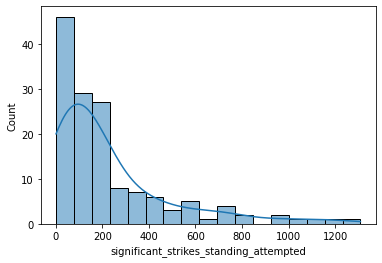

In [118]:
sns.histplot(data=group_frame_lw, x="significant_strikes_standing_attempted", kde=True)
#overall career numbers

In [119]:
group_frame_lw.loc[ group_frame_lw.significant_strikes_standing_attempted == group_frame_lw.significant_strikes_standing_attempted.max()]

,fighter_name,significant_strikes_standing_attempted,significant_strikes_standing_landed,significant_strikes_head_attempted,significant_strikes_body_attempted,significant_strikes_leg_attempted,significant_strikes_ground_attempted,significant_strikes_clinch_attempted,knockdowns,standing_time,head_ratio,body_ratio,leg_ratio
4,Al Iaquinta,1309,530,1102,172,97,28,34,6,6957,0.803793,0.125456,0.070751


In [120]:
group_frame_lw.loc[ group_frame_lw.significant_strikes_standing_attempted == group_frame_lw.significant_strikes_standing_attempted.min()]

,fighter_name,significant_strikes_standing_attempted,significant_strikes_standing_landed,significant_strikes_head_attempted,significant_strikes_body_attempted,significant_strikes_leg_attempted,significant_strikes_ground_attempted,significant_strikes_clinch_attempted,knockdowns,standing_time,head_ratio,body_ratio,leg_ratio
27,Colton Smith,1,0,1,1,1,0,2,0,28,0.333333,0.333333,0.333333
66,Jens Pulver,1,0,1,0,0,0,0,0,17,1.000000,0.000000,0.000000


<AxesSubplot:xlabel='significant_strikes_head_attempted', ylabel='Count'>

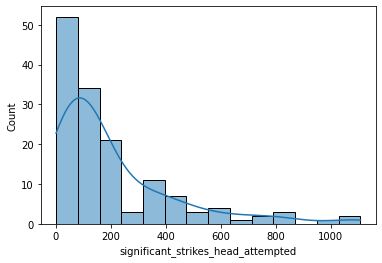

In [121]:
sns.histplot(data=group_frame_lw, x="significant_strikes_head_attempted", kde=True)

<AxesSubplot:xlabel='significant_strikes_body_attempted', ylabel='Count'>

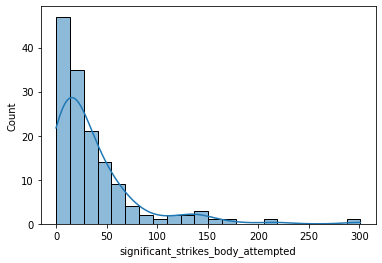

In [122]:
sns.histplot(data=group_frame_lw, x="significant_strikes_body_attempted", kde=True)

In [123]:
group_frame_lw.loc[ group_frame_lw.significant_strikes_body_attempted == group_frame_lw.significant_strikes_body_attempted.max()]

,fighter_name,significant_strikes_standing_attempted,significant_strikes_standing_landed,significant_strikes_head_attempted,significant_strikes_body_attempted,significant_strikes_leg_attempted,significant_strikes_ground_attempted,significant_strikes_clinch_attempted,knockdowns,standing_time,head_ratio,body_ratio,leg_ratio
102,Michael Johnson,1191,450,832,301,118,4,56,1,5091,0.665068,0.240608,0.094325


In [124]:
ratio_frame_lw = group_frame_lw[['fighter_name', 'head_ratio', 'body_ratio', 'leg_ratio' ]]
print('Mix Strikes')
ratio_frame_lw.head(148)

Mix Strikes


,fighter_name,head_ratio,body_ratio,leg_ratio
0,Aaron Riley,0.714286,0.142857,0.142857
1,Abel Trujillo,0.949367,0.050633,0.000000
2,Adriano Martins,0.772727,0.136364,0.090909
3,Akbarh Arreola,0.730435,0.130435,0.139130
4,Al Iaquinta,0.803793,0.125456,0.070751
...,...,...,...,...
139,Tyson Griffin,0.781609,0.183908,0.034483
140,Valmir Lazaro,0.830709,0.118110,0.051181
141,Vinc Pichel,0.601770,0.159292,0.238938
142,Will Brooks,0.660000,0.253333,0.086667


In [125]:
print('Average Strike Mix ratios of LW')
ratio_frame_lw.mean()

Average Strike Mix ratios of LW


head_ratio    0.761955
body_ratio    0.138499
leg_ratio     0.099546
dtype: float64

In [126]:
#STRIKE LOCATION
location_ratio_lw = group_frame_lw[['fighter_name', 'significant_strikes_standing_attempted', 'significant_strikes_ground_attempted', 'significant_strikes_clinch_attempted']].groupby('fighter_name').sum().reset_index()

In [127]:
location_ratio_lw['standing_ratio'] = location_ratio_lw.significant_strikes_standing_attempted / (location_ratio_lw.significant_strikes_standing_attempted + location_ratio_lw.significant_strikes_ground_attempted + location_ratio_lw.significant_strikes_clinch_attempted)
location_ratio_lw['ground_ratio'] = location_ratio_lw.significant_strikes_ground_attempted / (location_ratio_lw.significant_strikes_standing_attempted + location_ratio_lw.significant_strikes_ground_attempted + location_ratio_lw.significant_strikes_clinch_attempted)
location_ratio_lw['clinch_ratio'] = location_ratio_lw.significant_strikes_clinch_attempted / (location_ratio_lw.significant_strikes_standing_attempted + location_ratio_lw.significant_strikes_ground_attempted + location_ratio_lw.significant_strikes_clinch_attempted)

print('Strike Location')
location_ratio_lw[['fighter_name', 'standing_ratio', 'ground_ratio', 'clinch_ratio']]

Strike Location


,fighter_name,standing_ratio,ground_ratio,clinch_ratio
0,Aaron Riley,1.000000,0.000000,0.000000
1,Abel Trujillo,0.784810,0.000000,0.215190
2,Adriano Martins,0.636364,0.363636,0.000000
3,Akbarh Arreola,0.756522,0.226087,0.017391
4,Al Iaquinta,0.954778,0.020423,0.024799
...,...,...,...,...
139,Tyson Griffin,0.666667,0.218391,0.114943
140,Valmir Lazaro,0.960630,0.000000,0.039370
141,Vinc Pichel,0.504425,0.221239,0.274336
142,Will Brooks,0.706667,0.040000,0.253333


In [128]:
print('Average Lw Fight locations')
#advise should probably drop some fighters as they have extreme values
location_ratio_lw[['fighter_name', 'standing_ratio', 'ground_ratio', 'clinch_ratio']].mean()


Average Lw Fight locations


standing_ratio    0.819711
ground_ratio      0.087456
clinch_ratio      0.092832
dtype: float64

In [129]:
expected_by_target_lw = df_lw[[ 'significant_strikes_head_landed', 'significant_strikes_head_attempted', 'significant_strikes_body_landed', 'significant_strikes_body_attempted', 'significant_strikes_leg_landed','significant_strikes_leg_attempted', 'takedowns_attempted', 'takedowns', 'unique_round_id', 'winning_fighter_name','losing_fighter_name']]

expected_by_target_lw['head_accuracy_lw'] = expected_by_target_lw.significant_strikes_head_landed / expected_by_target_lw.significant_strikes_head_attempted * 100
expected_by_target_lw['body_accuracy_lw'] = expected_by_target_lw.significant_strikes_body_landed / expected_by_target_lw.significant_strikes_body_attempted * 100
expected_by_target_lw['leg_accuracy_lw'] = expected_by_target_lw.significant_strikes_leg_landed / expected_by_target_lw.significant_strikes_leg_attempted * 100





expected_by_target_lw = expected_by_target_lw.dropna()
expected_by_target_lw = expected_by_target_lw.reset_index(drop=True)

head_accuracy_avg_lw = expected_by_target_lw['head_accuracy_lw'].mean()
body_accuracy_avg_lw = expected_by_target_lw['body_accuracy_lw'].mean()
leg_accuracy_avg_lw = expected_by_target_lw['leg_accuracy_lw'].mean()

print(head_accuracy_avg_lw)
print(body_accuracy_avg_lw)
print(leg_accuracy_avg_lw)


expected_by_target_lw.head(20)


31.685994043427122
64.50435254752306
81.62854584049855


<ipython-input-129-78229188b346>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expected_by_target_lw['head_accuracy_lw'] = expected_by_target_lw.significant_strikes_head_landed / expected_by_target_lw.significant_strikes_head_attempted * 100
<ipython-input-129-78229188b346>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expected_by_target_lw['body_accuracy_lw'] = expected_by_target_lw.significant_strikes_body_landed / expected_by_target_lw.significant_strikes_body_attempted * 100
<ipython-input-129-782

,significant_strikes_head_landed,significant_strikes_head_attempted,significant_strikes_body_landed,significant_strikes_body_attempted,significant_strikes_leg_landed,significant_strikes_leg_attempted,takedowns_attempted,takedowns,unique_round_id,winning_fighter_name,losing_fighter_name,head_accuracy_lw,body_accuracy_lw,leg_accuracy_lw
0,4,17,6,6,1,1,6,2,1,Anthony Pettis,Michael Chiesa,23.529412,100.000000,100.000000
1,2,10,3,4,2,3,0,0,2,Anthony Pettis,Michael Chiesa,20.000000,75.000000,66.666667
2,8,23,6,7,5,5,3,1,6,Joe Lauzon,Michael Chiesa,34.782609,85.714286,100.000000
3,6,17,4,4,1,1,1,0,8,Joe Lauzon,Michael Chiesa,35.294118,100.000000,100.000000
4,9,38,2,2,1,1,1,0,45,Eddie Alvarez,Rafael Dos Anjos,23.684211,100.000000,100.000000
5,34,67,8,8,3,3,3,1,46,Eddie Alvarez,Rafael Dos Anjos,50.746269,100.000000,100.000000
6,1,12,2,2,1,1,0,0,47,Jeremy Stephens,Rafael Dos Anjos,8.333333,100.000000,100.000000
7,7,18,3,4,2,2,0,0,49,Jeremy Stephens,Rafael Dos Anjos,38.888889,75.000000,100.000000
8,9,15,1,2,2,2,0,0,59,Al Iaquinta,Diego Sanchez,60.000000,50.000000,100.000000
9,15,54,3,5,1,1,0,0,77,Rafael Dos Anjos,Anthony Pettis,27.777778,60.000000,100.000000


<AxesSubplot:xlabel='significant_strikes_head_attempted', ylabel='Count'>

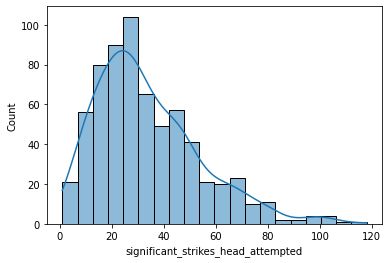

In [130]:
sns.histplot(data=expected_by_target_lw, x="significant_strikes_head_attempted", kde=True)